In [3]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import pandas as pd
import sys

'''
src_path = sys.path[0].replace("figures\visualization\script", "src")
#replace notebook as scripts
data_path = sys.path[0].replace("figures\visualization\script", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("figures\visualization\script", "output")
'''

# set default params of plot
rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
mpl.rcParams.update(rc_)

from plot_helper import *

#path_prefix=r'D:\Codes\Energy_grid_new'
path_prefix=r'L:\Coding_project\Energy_grid_new'

# plot for thesis topic 1

to testify the MPC performance with and without dc in a wider test scope

In [2]:
# include following param settings
# MPC-GT
# MPC-Prediction
# MPC-Disturbance-normal-0.03
# MPC-Heuristic
# MPC-Naive
# RBC-MSC

A. 12months dc=0.6&dc=0

In [3]:
# load data

path=path_prefix+r"\output\experiments\thesis_topic1\6h-bat-12months-0.6dc.xlsx"
df_6dc=pd.read_excel(path)
df_opex_6dc=pre_process(df_6dc,'OPEX','month_of_year')
df_tou_6dc=pre_process(df_6dc,"tou_cost",'month_of_year')

path=path_prefix+r"\output\experiments\thesis_topic1\6h-bat-12months-0dc.xlsx"
df_0dc=pd.read_excel(path)
df_opex_0dc=pre_process(df_0dc,'OPEX','month_of_year')
df_tou_0dc=pre_process(df_0dc,"tou_cost",'month_of_year')

   strategy   pred_model  month_of_year        OPEX            label   
0       MPC           GT              1  351.747123           MPC-GT  \
1       MPC   Prediction              1  364.843711   MPC-Prediction   
2       MPC  Disturbance              1  357.335552  MPC-Disturbance   
3       MPC    Heuristic              1  360.866129    MPC-Heuristic   
4       MPC        Naive              1  360.946711        MPC-Naive   
..      ...          ...            ...         ...              ...   
67      MPC   Prediction             12  335.081370   MPC-Prediction   
68      MPC  Disturbance             12  326.453428  MPC-Disturbance   
69      MPC    Heuristic             12  326.782327    MPC-Heuristic   
70      MPC        Naive             12  329.790152        MPC-Naive   
71      MSC           GT             12  400.684694           MSC-GT   

    relative_OPEX  
0        0.000000  
1       14.998987  
2        6.400200  
3       10.443625  
4       10.535912  
..            .

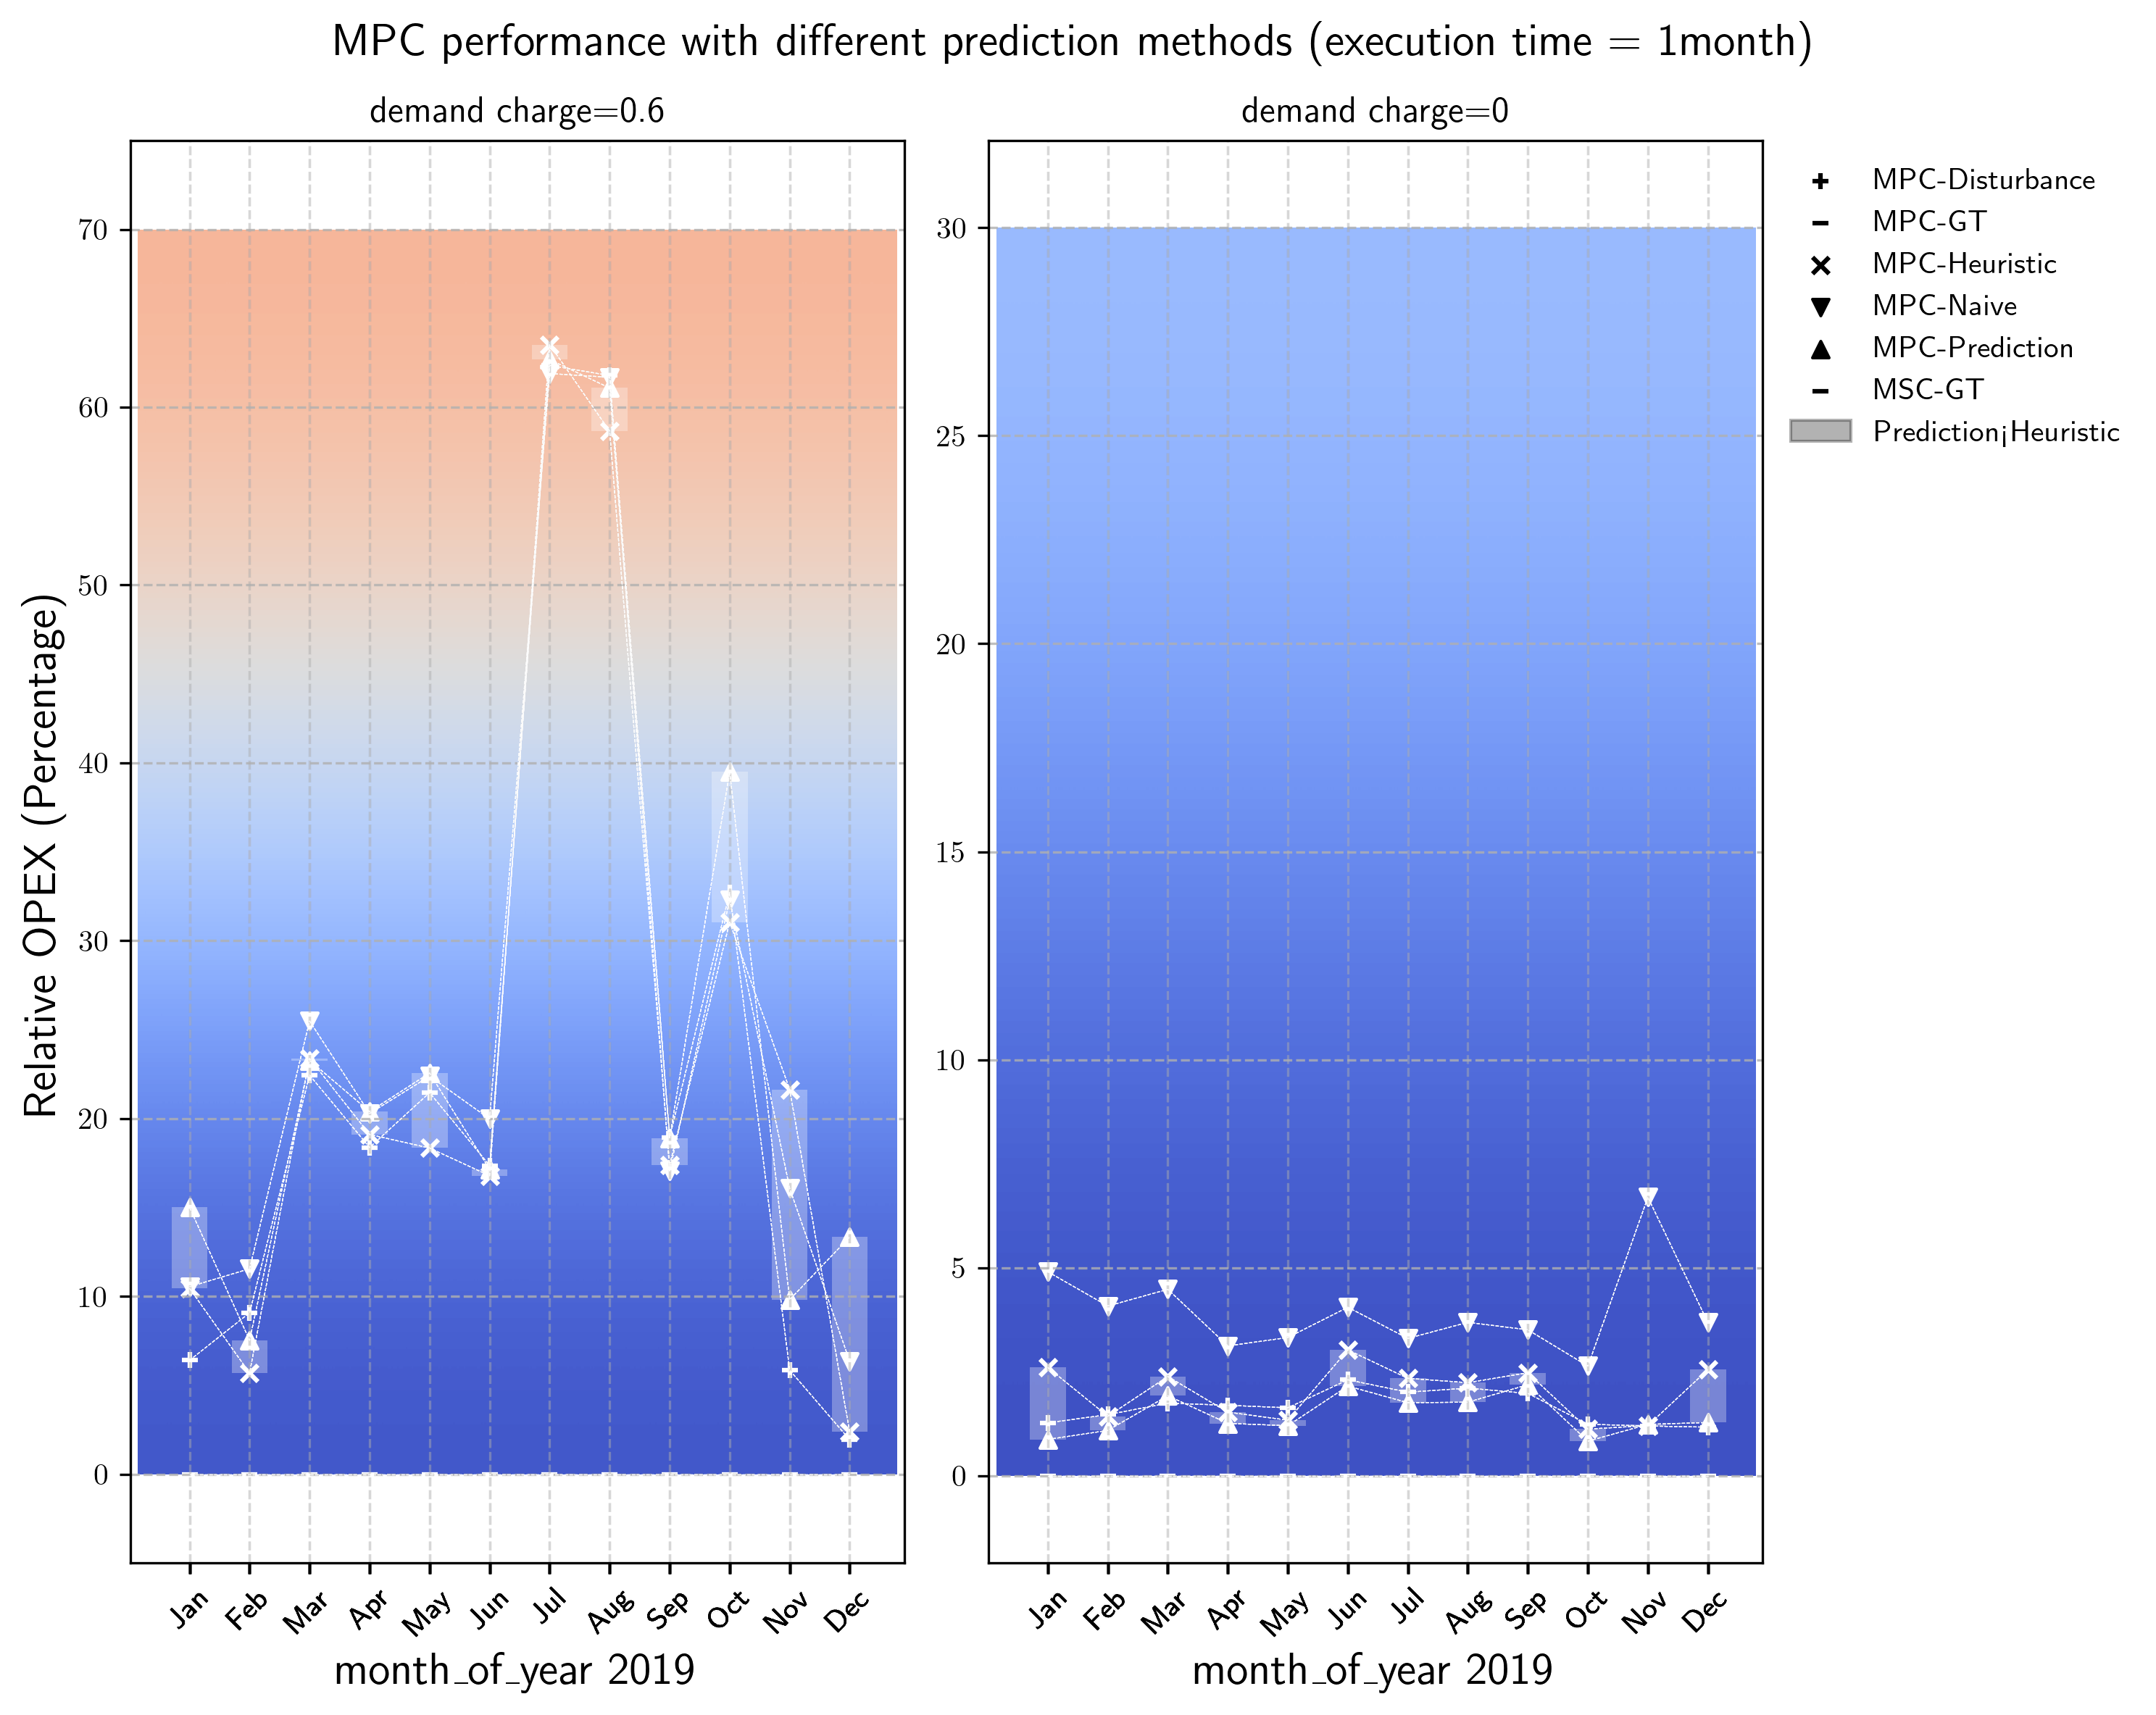

In [5]:

plot_params={
    "subplots":{
        "0":{
            "df":df_opex_6dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0.6",
            "limit":[-5,75],
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                }
            },
        "1":{
            "df":df_opex_0dc,
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0",
            "limit":[-2.1,32.1],
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.3],
                "alpha":1
                }
            },
    },
    "relative":True,
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":250,
    "sharey":False,
    "show_line":True,
    "save_fn":'multi-thesis-topic1-6h-bat-12months-0.6&0dc-relative-opex-line-gradient.png',
    "suptitle":"MPC performance with different prediction methods (execution time = 1month)"
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)


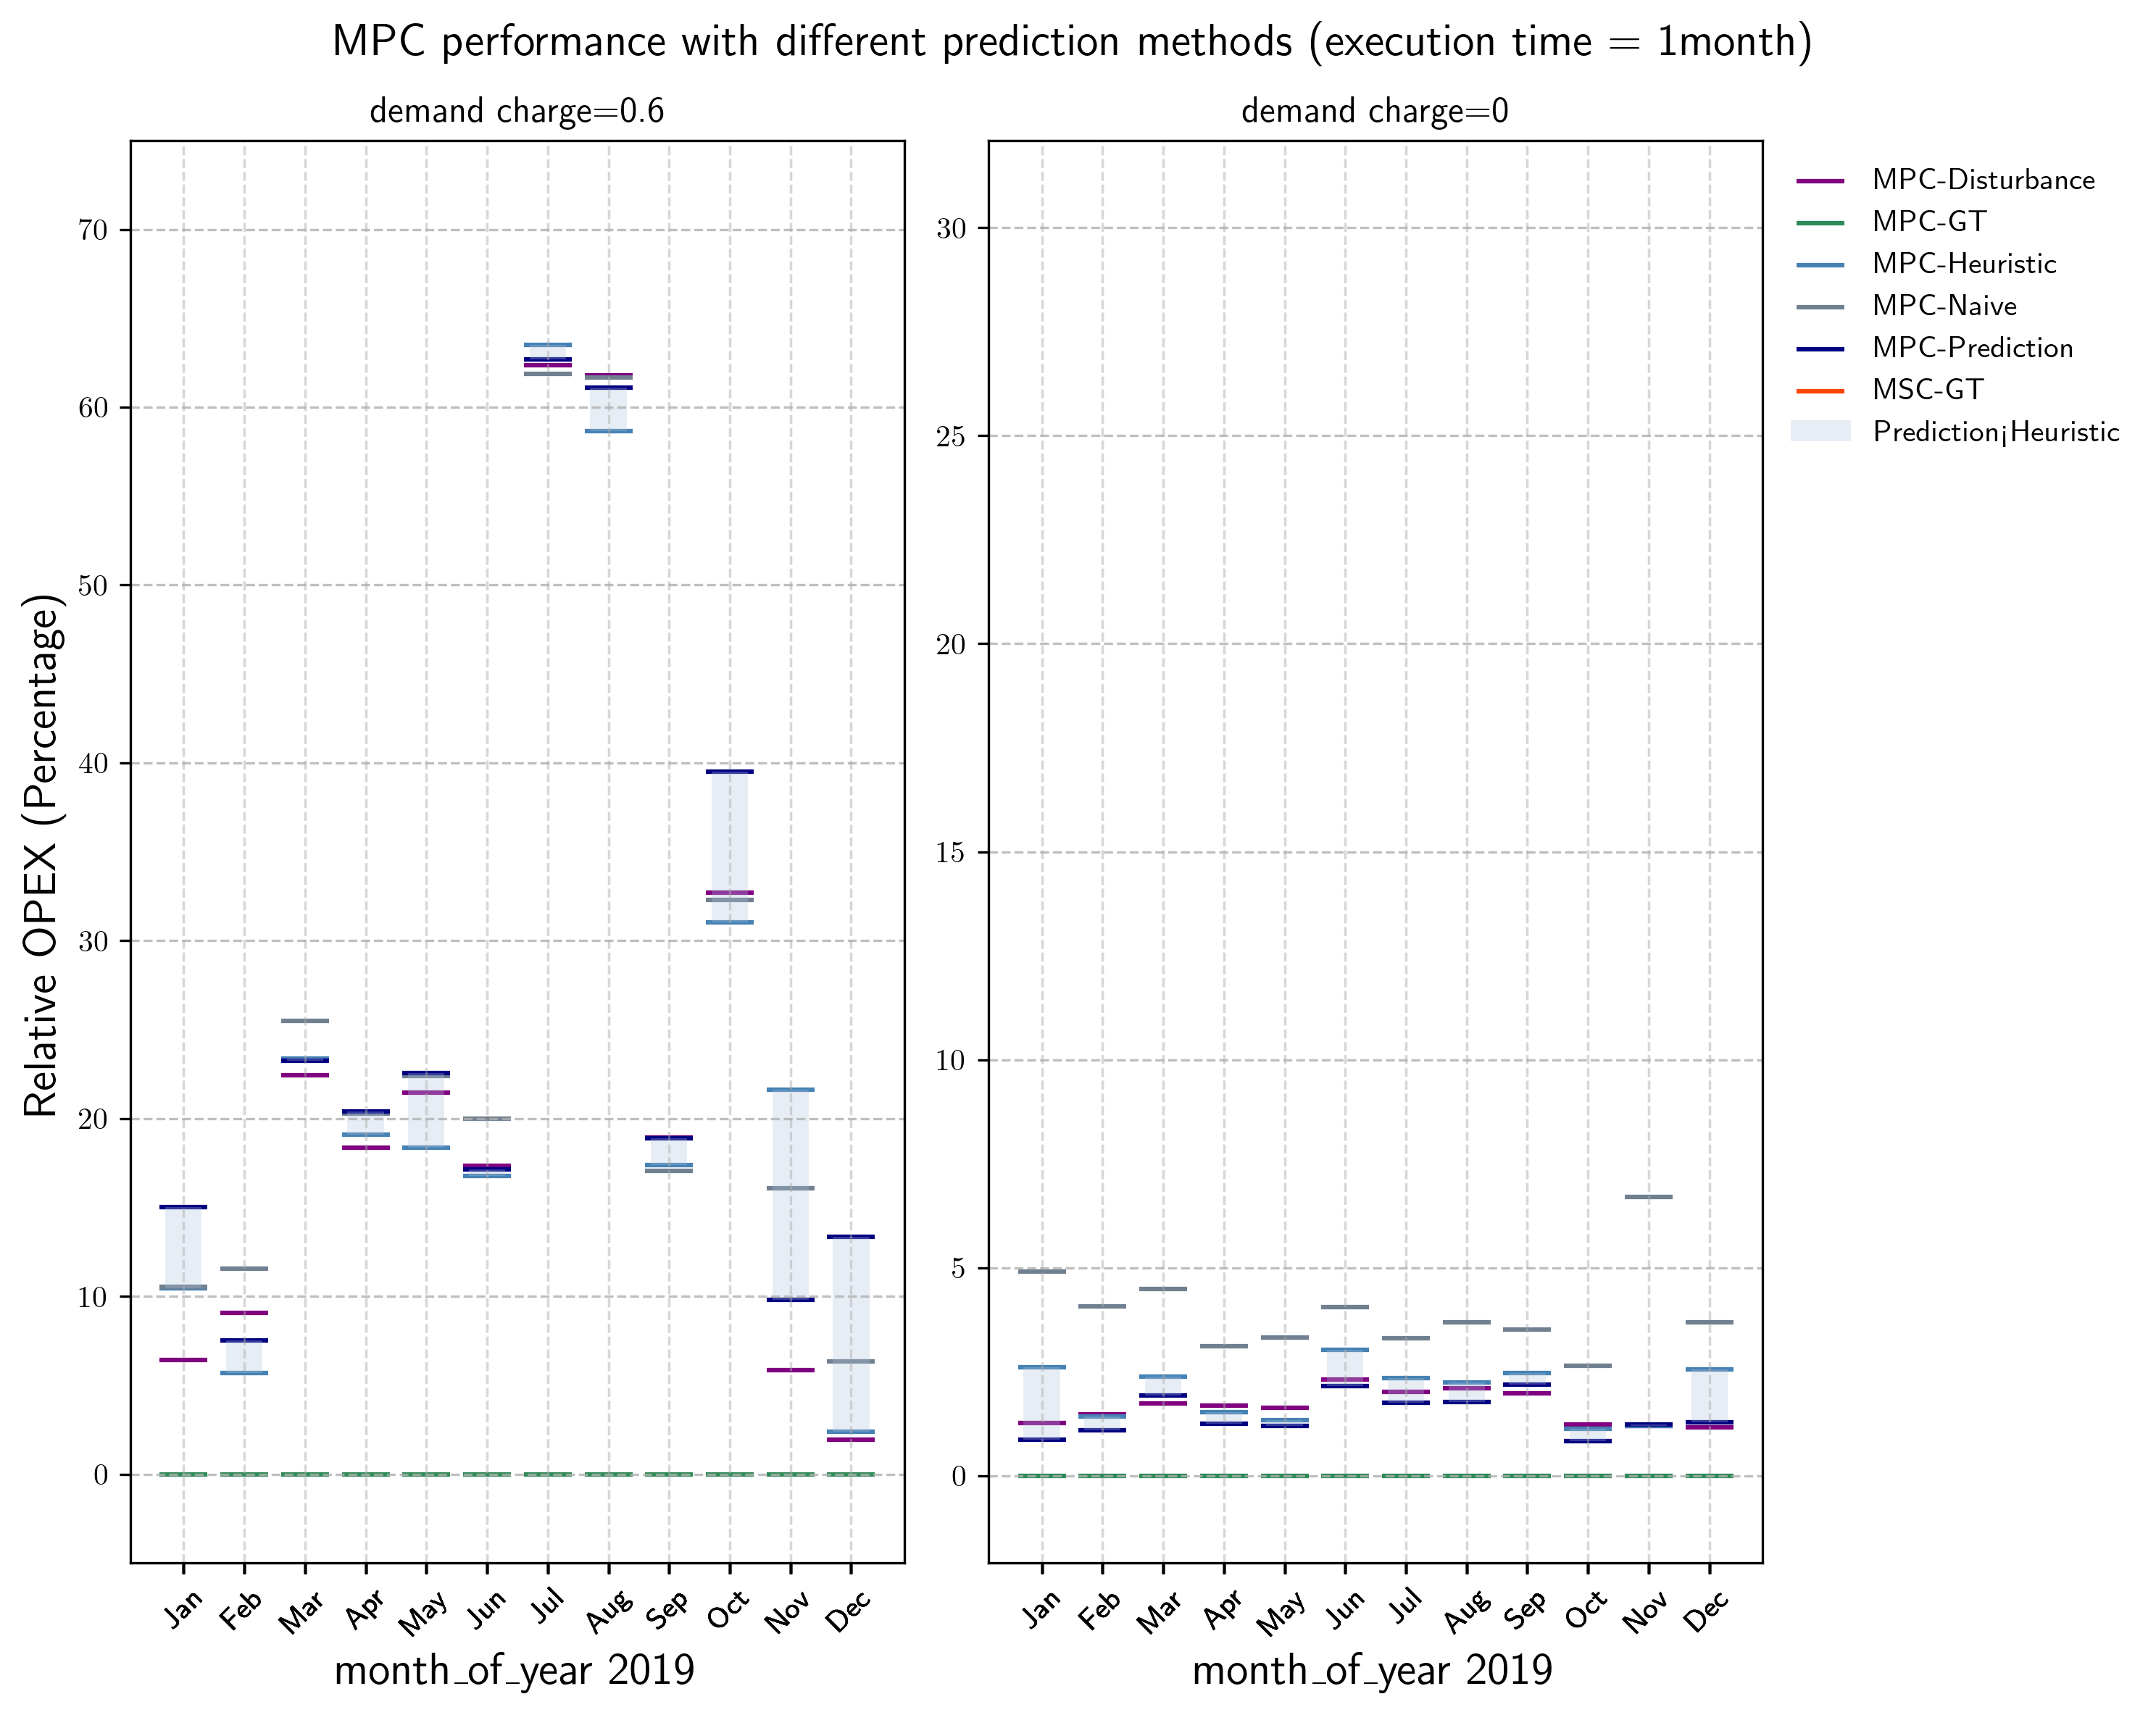

In [4]:
plot_params={
    "subplots":{
        "0":{
            "df":df_opex_6dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0.6",
            "limit":[-5,75],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                }
            },
        "1":{
            "df":df_opex_0dc,
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0",
            "limit":[-2.1,32.1],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.3],
                "alpha":1
                }
            },
    },
    "relative":True,
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":250,
    "sharey":False,
    "show_line":False,
    "save_fn":'multi-thesis-topic1-6h-bat-12months-0.6&0dc-relative-opex.png',
    "suptitle":"MPC performance with different prediction methods (execution time = 1month)"
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)

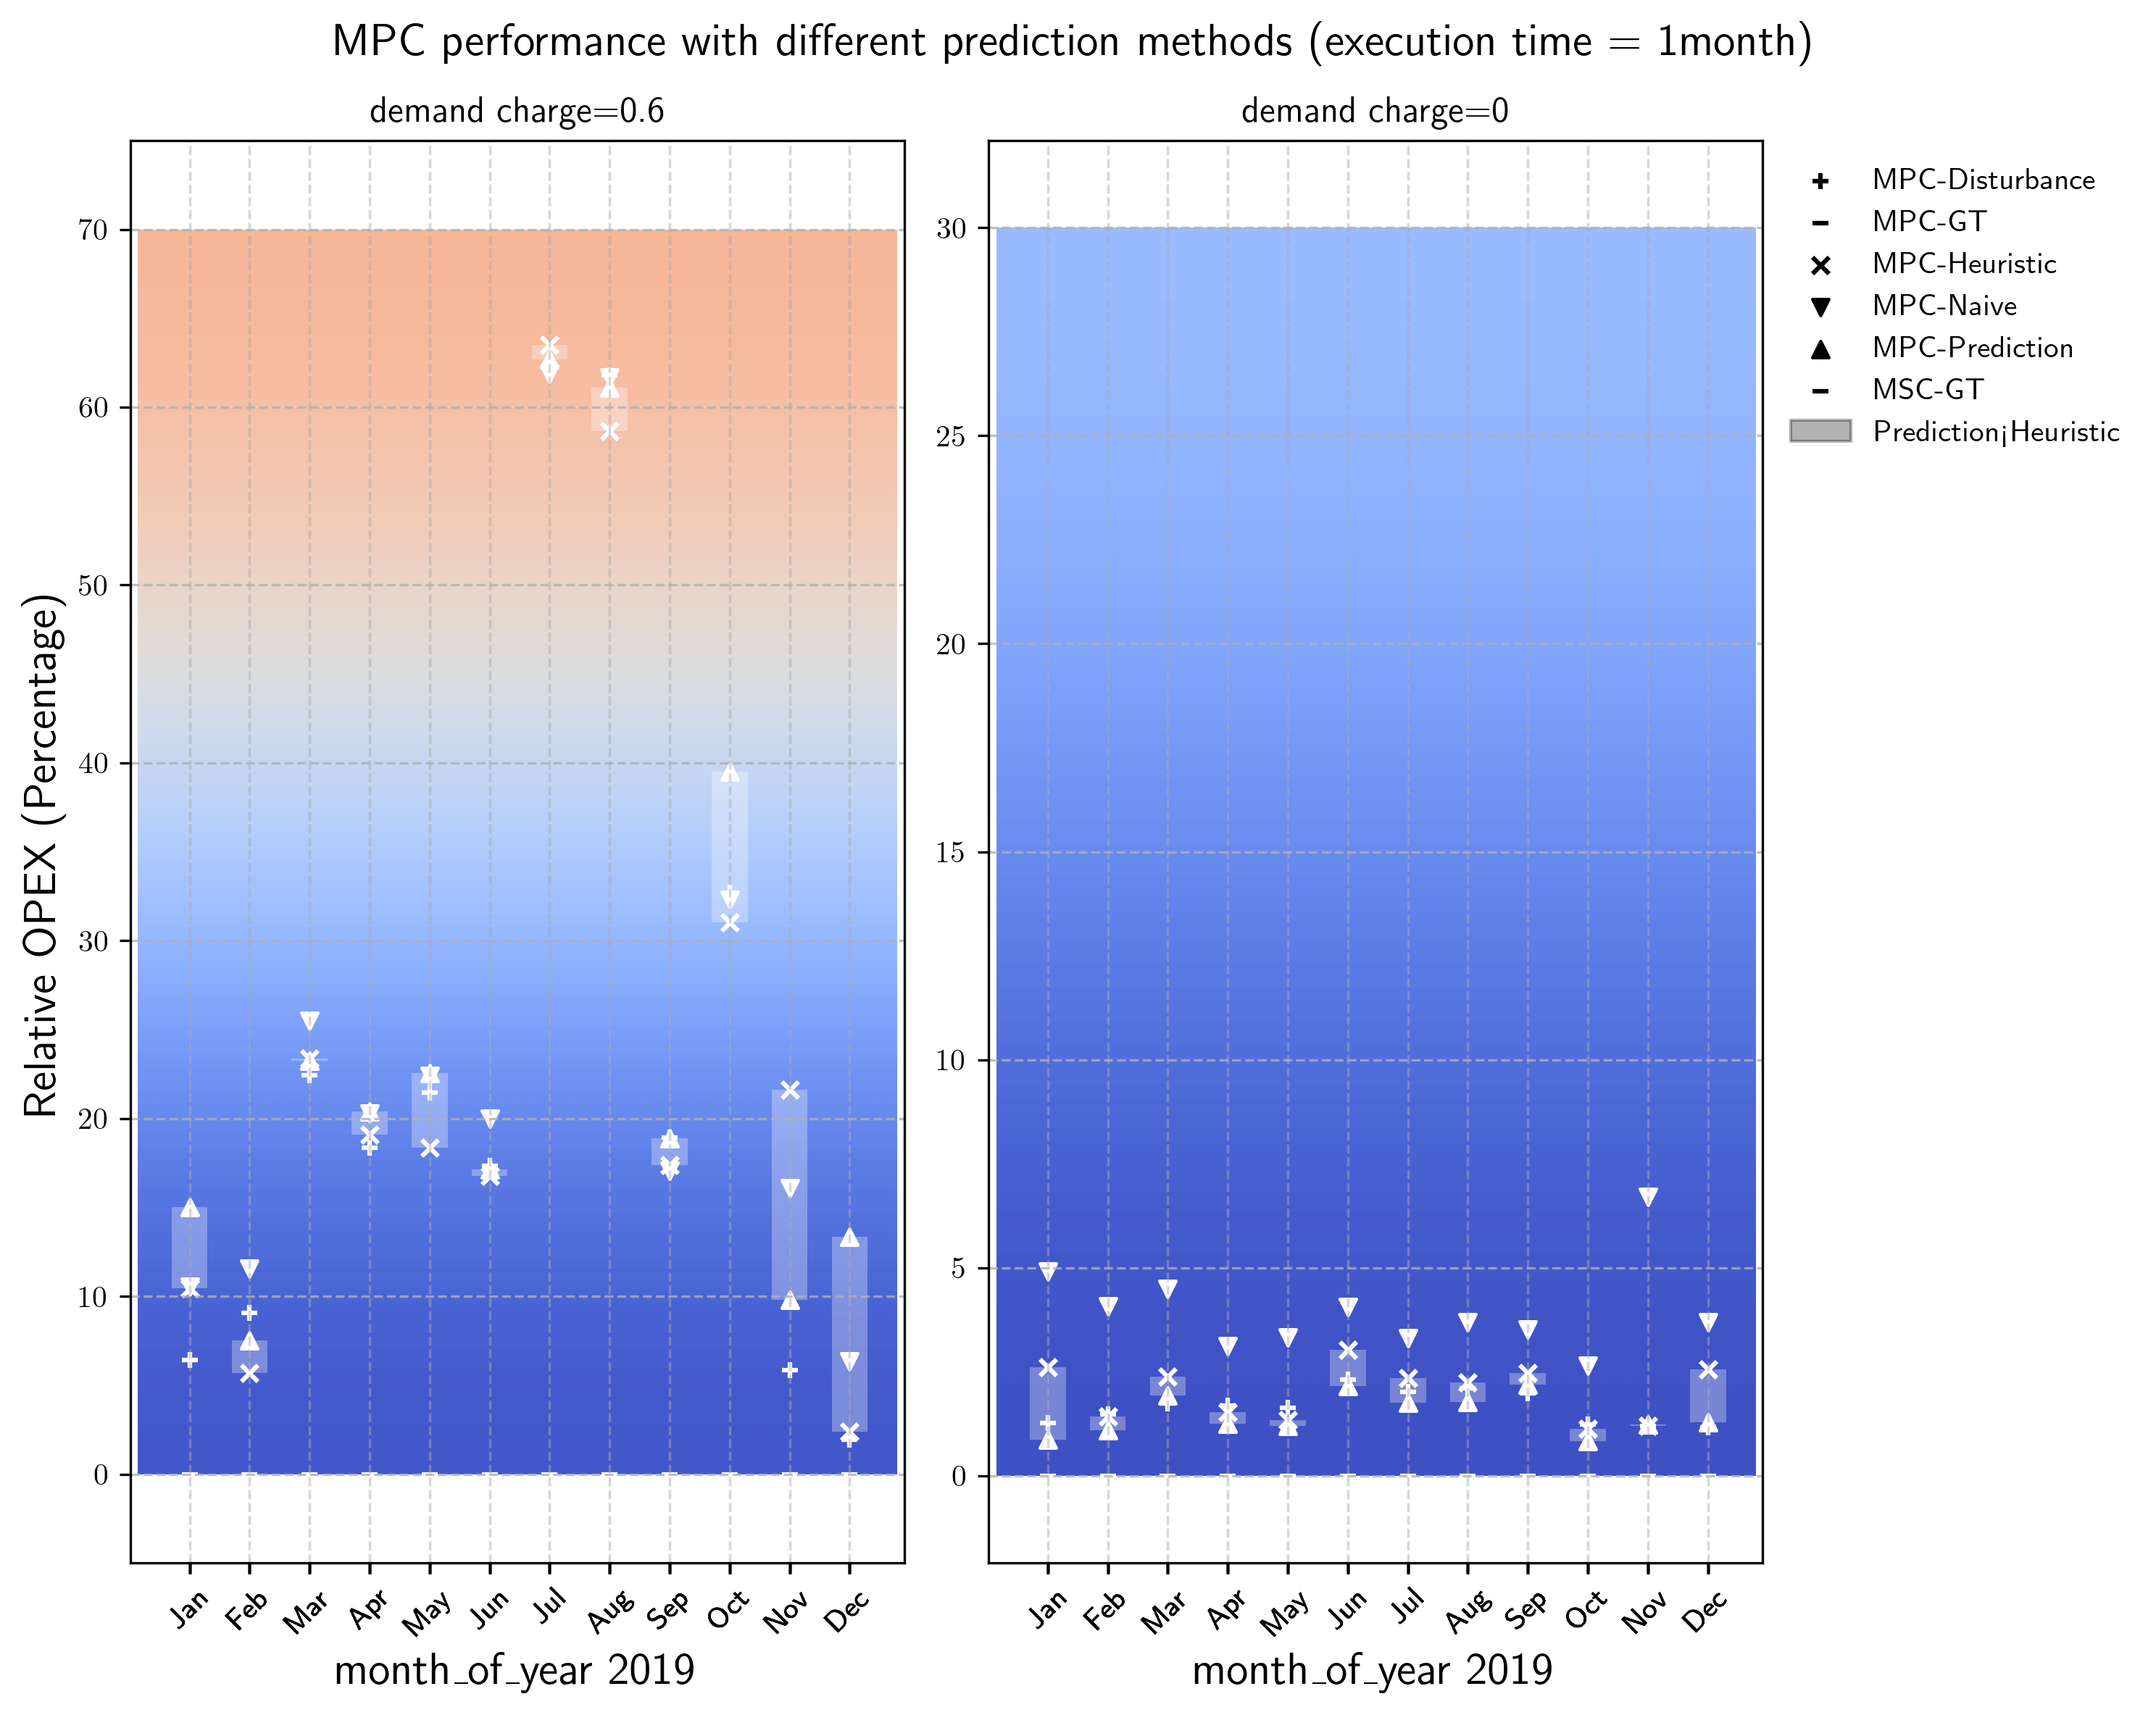

In [6]:
plot_params={
    "subplots":{
        "0":{
            "df":df_opex_6dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0.6",
            "limit":[-5,75],
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                }
            },
        "1":{
            "df":df_opex_0dc,
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0",
            "limit":[-2.1,32.1],
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.3],
                "alpha":1
                }
            },
    },
    "relative":True,
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":250,
    "sharey":False,
    "show_line":False,
    "save_fn":'multi-thesis-topic1-6h-bat-12months-0.6&0dc-relative-opex-gradient.png',
    "suptitle":"MPC performance with different prediction methods (execution time = 1month)"
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)

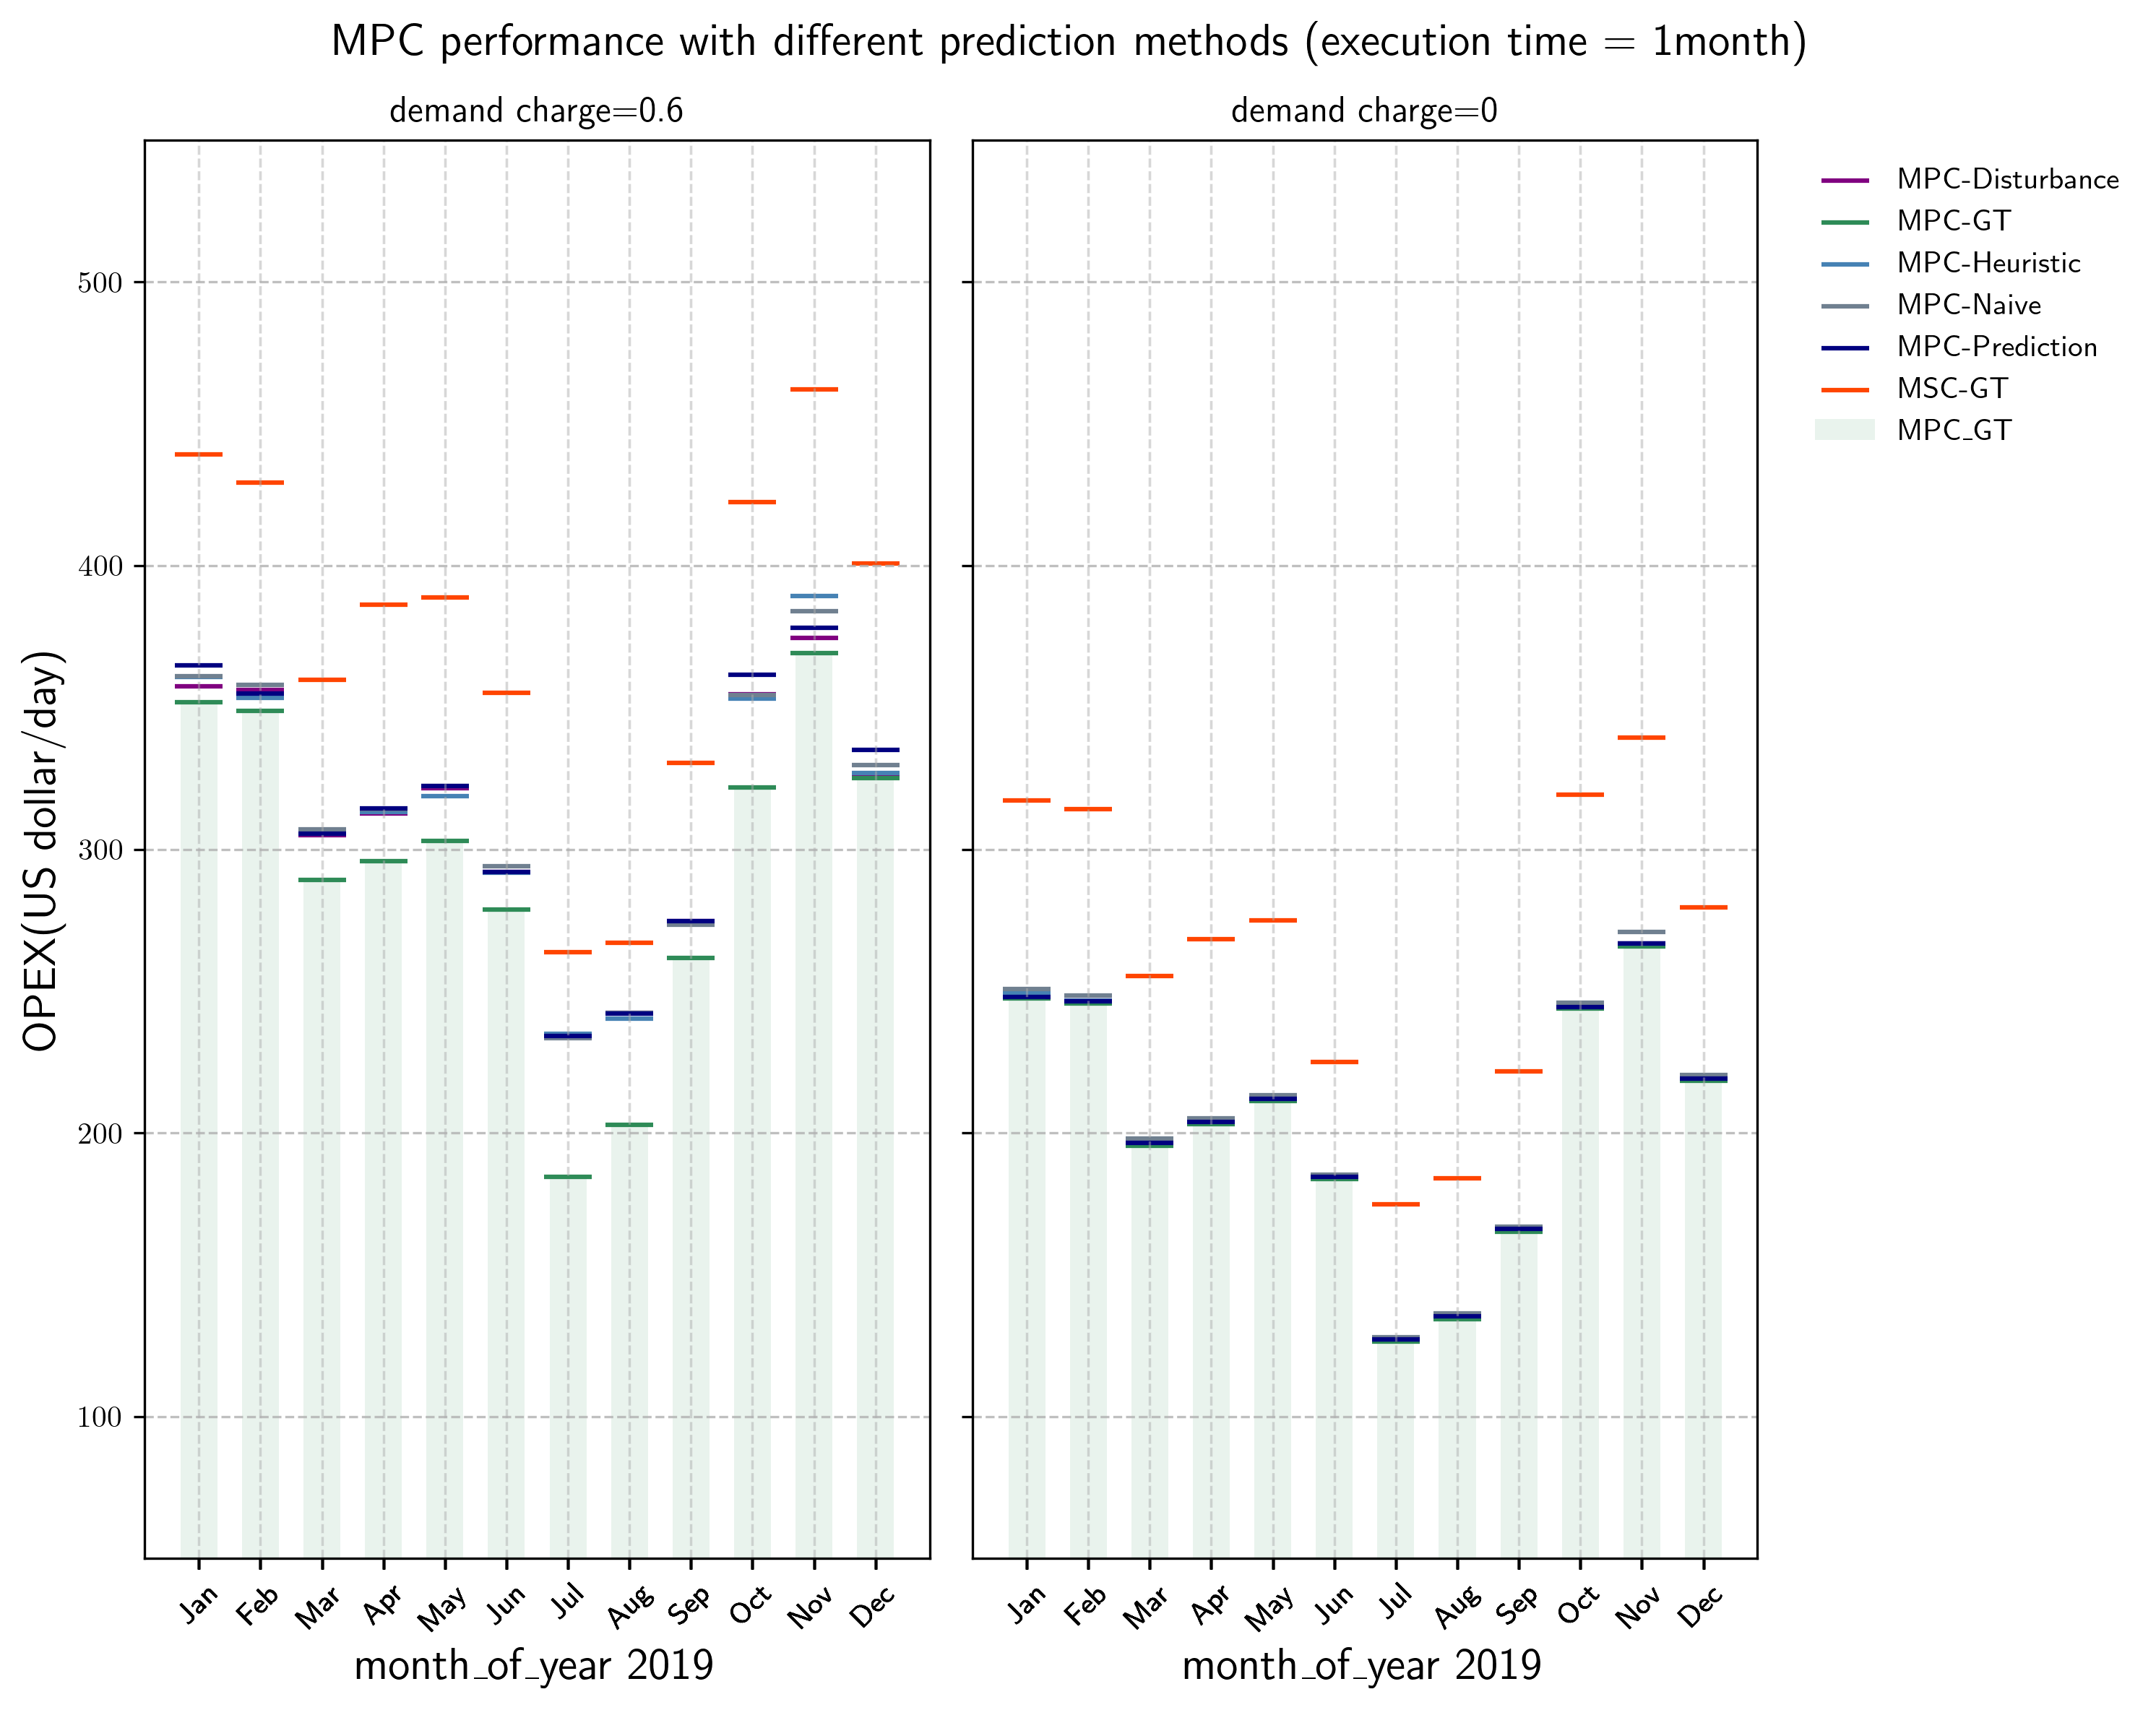

In [4]:
plot_params={
    "subplots":{
        "0":{
            "df":df_opex_6dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0.6",
            "limit":[50,550],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                }
            },
        "1":{
            "df":df_opex_0dc,
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0",
            "limit":[50,550],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.3],
                "alpha":1
                }
            },
    },
    "relative":False,
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic1-6h-bat-12months-0.6&0dc-relative-opex-notrelative.png',
    "suptitle":"MPC performance with different prediction methods (execution time = 1month)"
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)

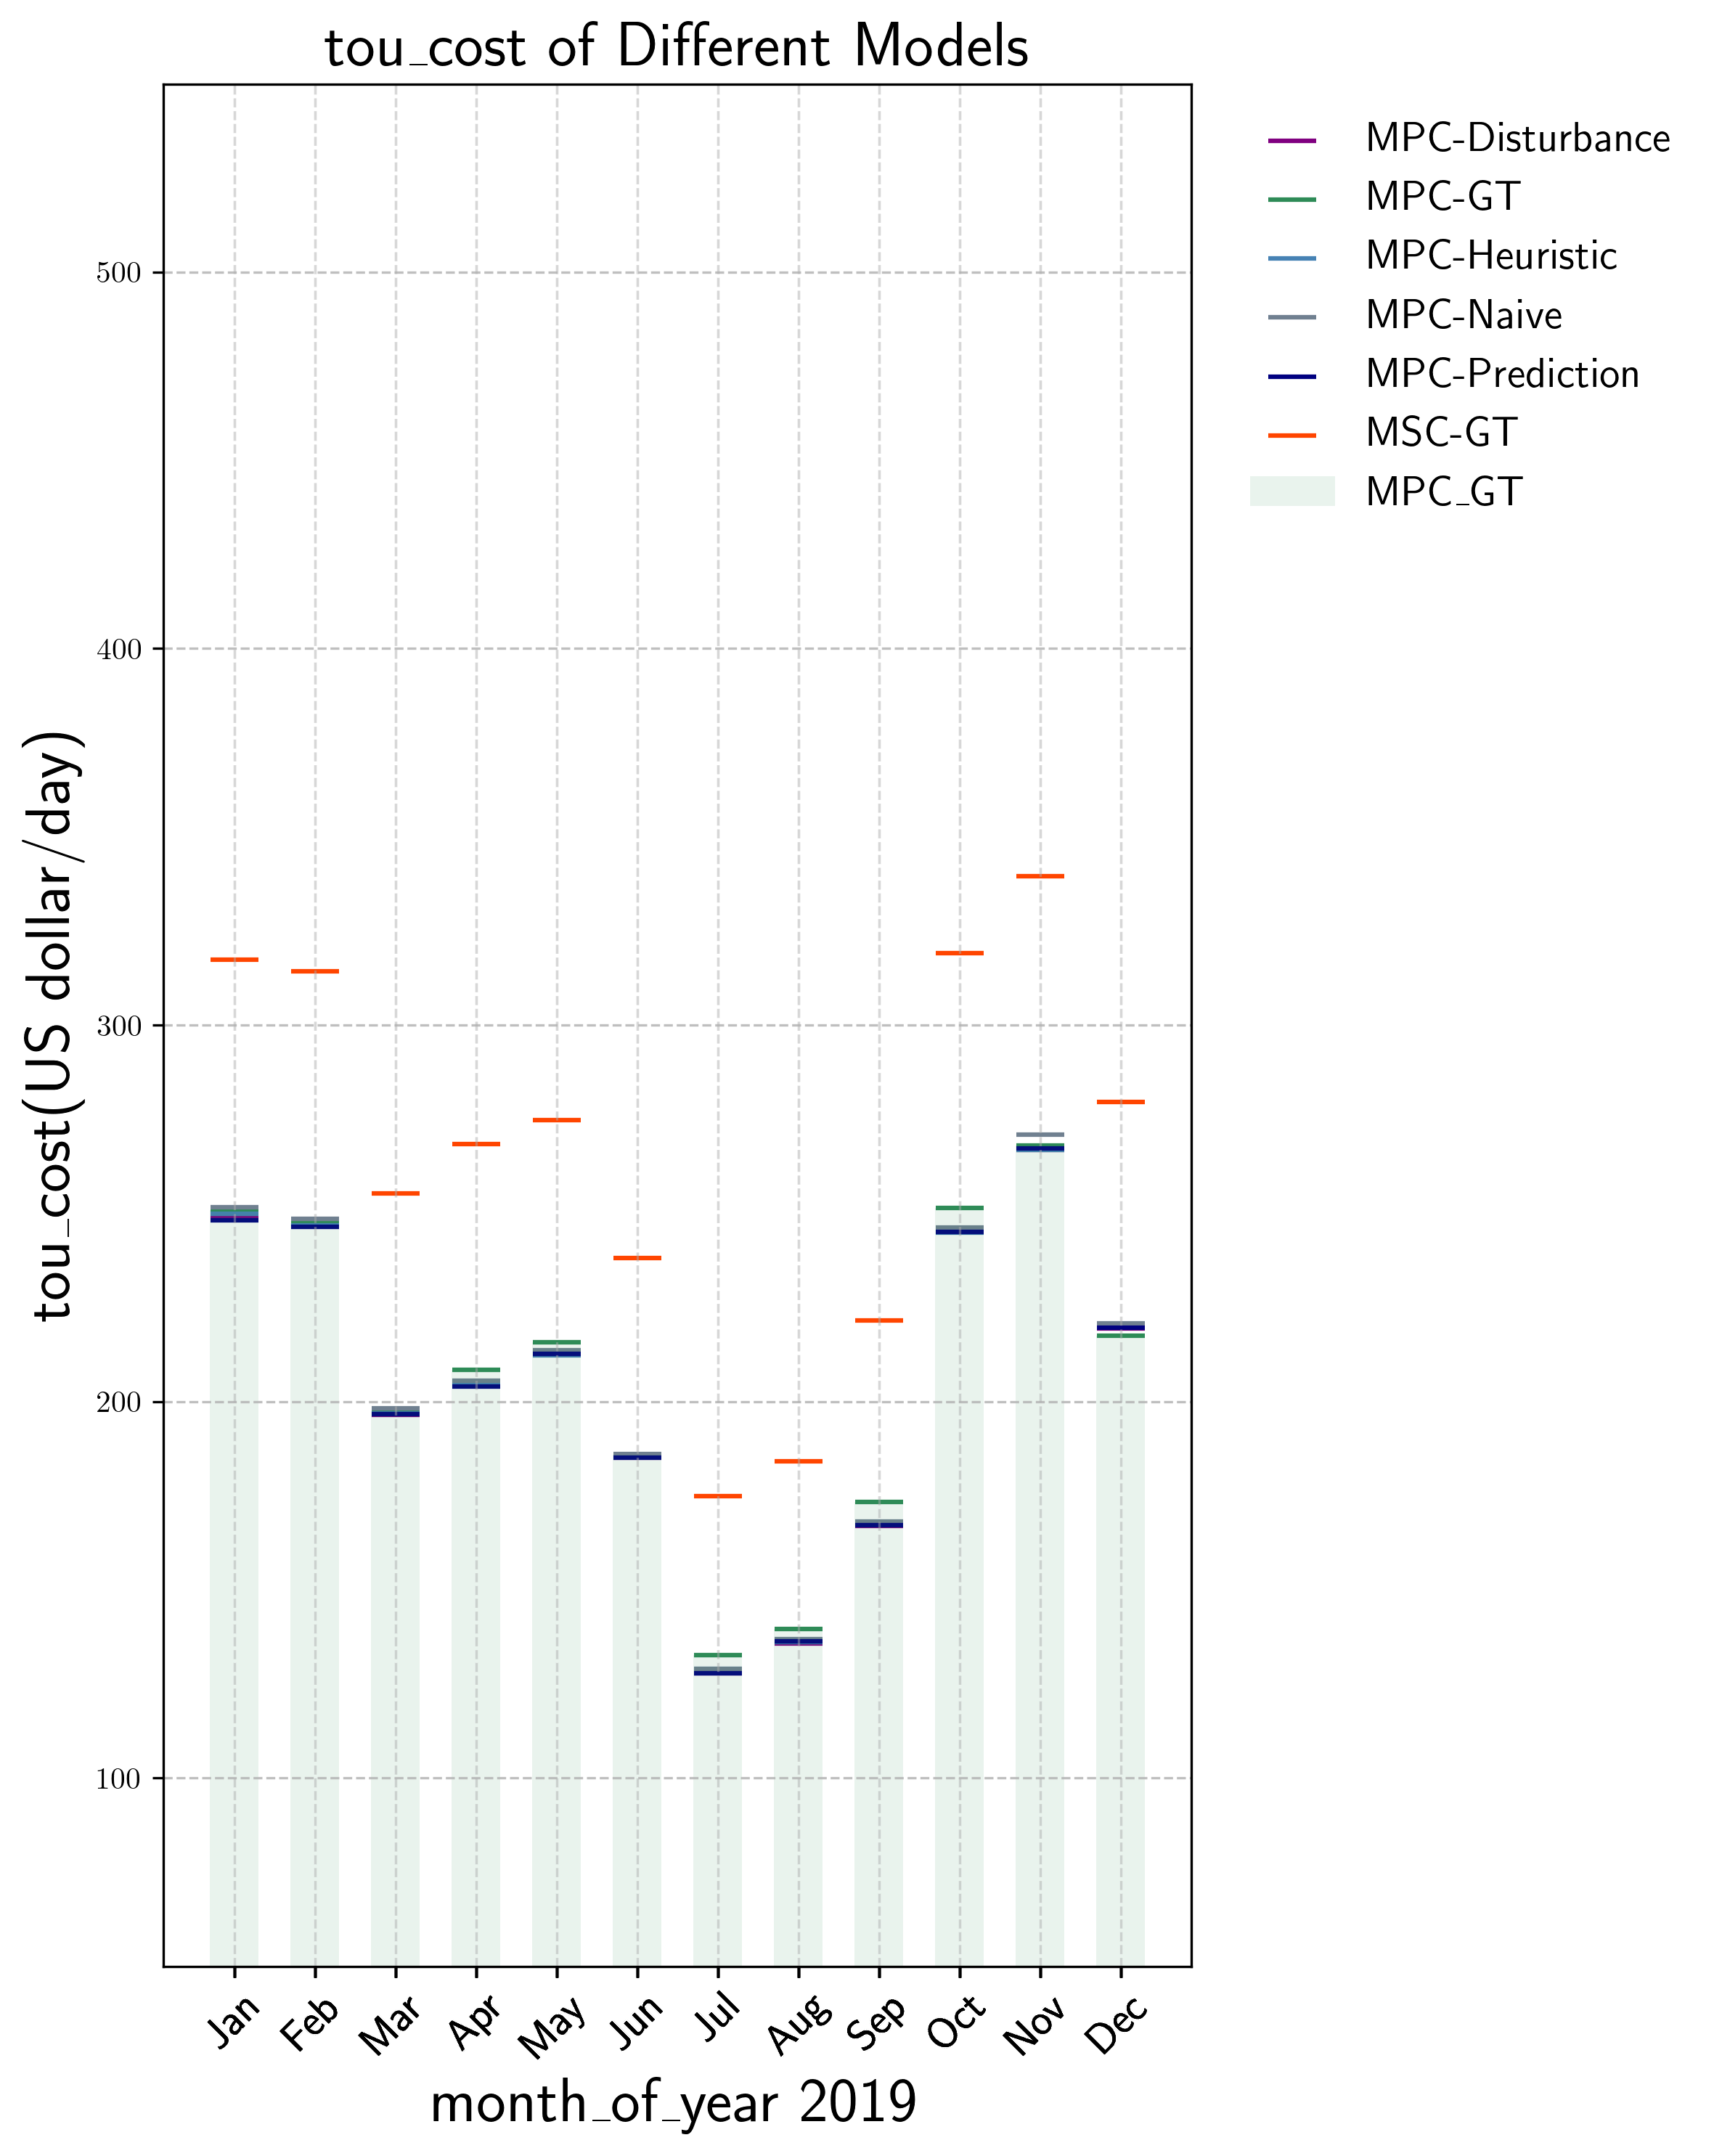

In [10]:
limit=[50,550]
figsize=(8,10)
tou_month_6dc=plot_origin_valid_bar(df=df_tou_6dc,relative=False,limit=limit,figsize=figsize,
                      key='tou_cost',save_fn='thesis-topic1-6h-bat-12months-0.6dc-tou.png',
                      fontsize=14,duration_key='month_of_year')

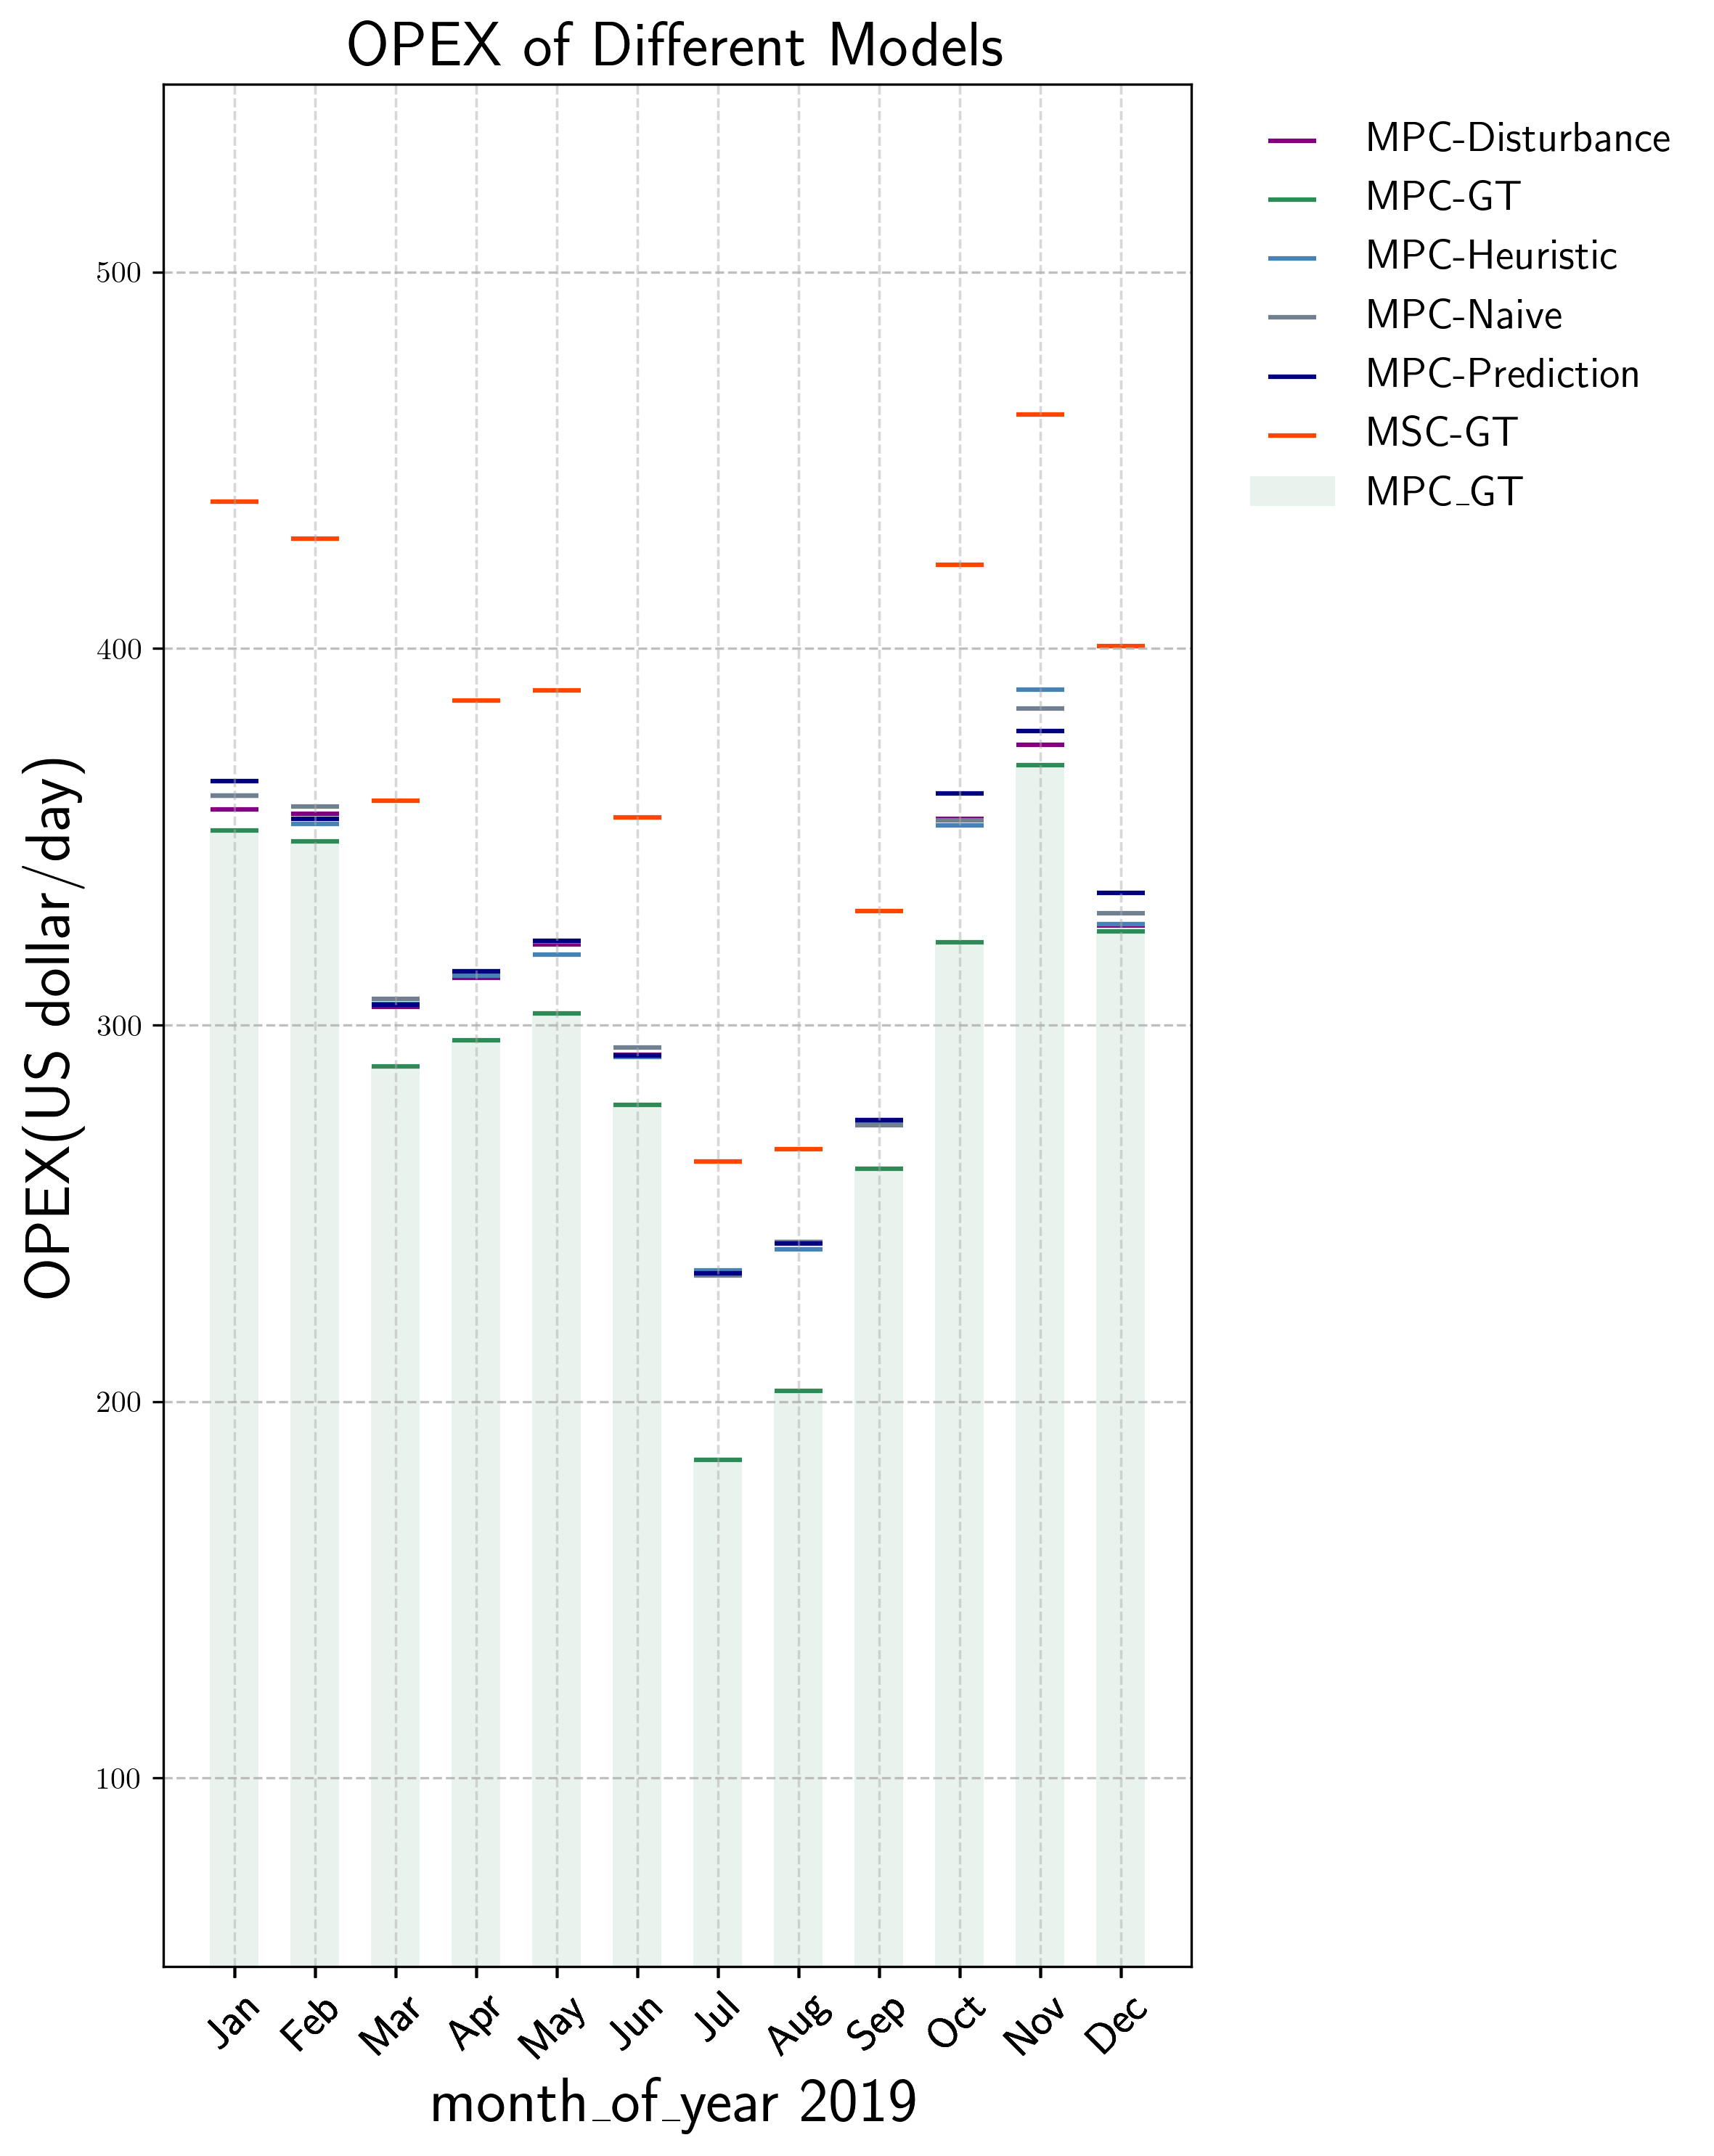

In [11]:
limit=[50,550]
figsize=(8,10)
opex_month_6dc=plot_origin_valid_bar(df=df_opex_6dc,relative=False,limit=limit,figsize=figsize,
                      key='OPEX',save_fn='thesis-topic1-6h-bat-12months-0.6dc-opex.png',
                      fontsize=14,duration_key='month_of_year')

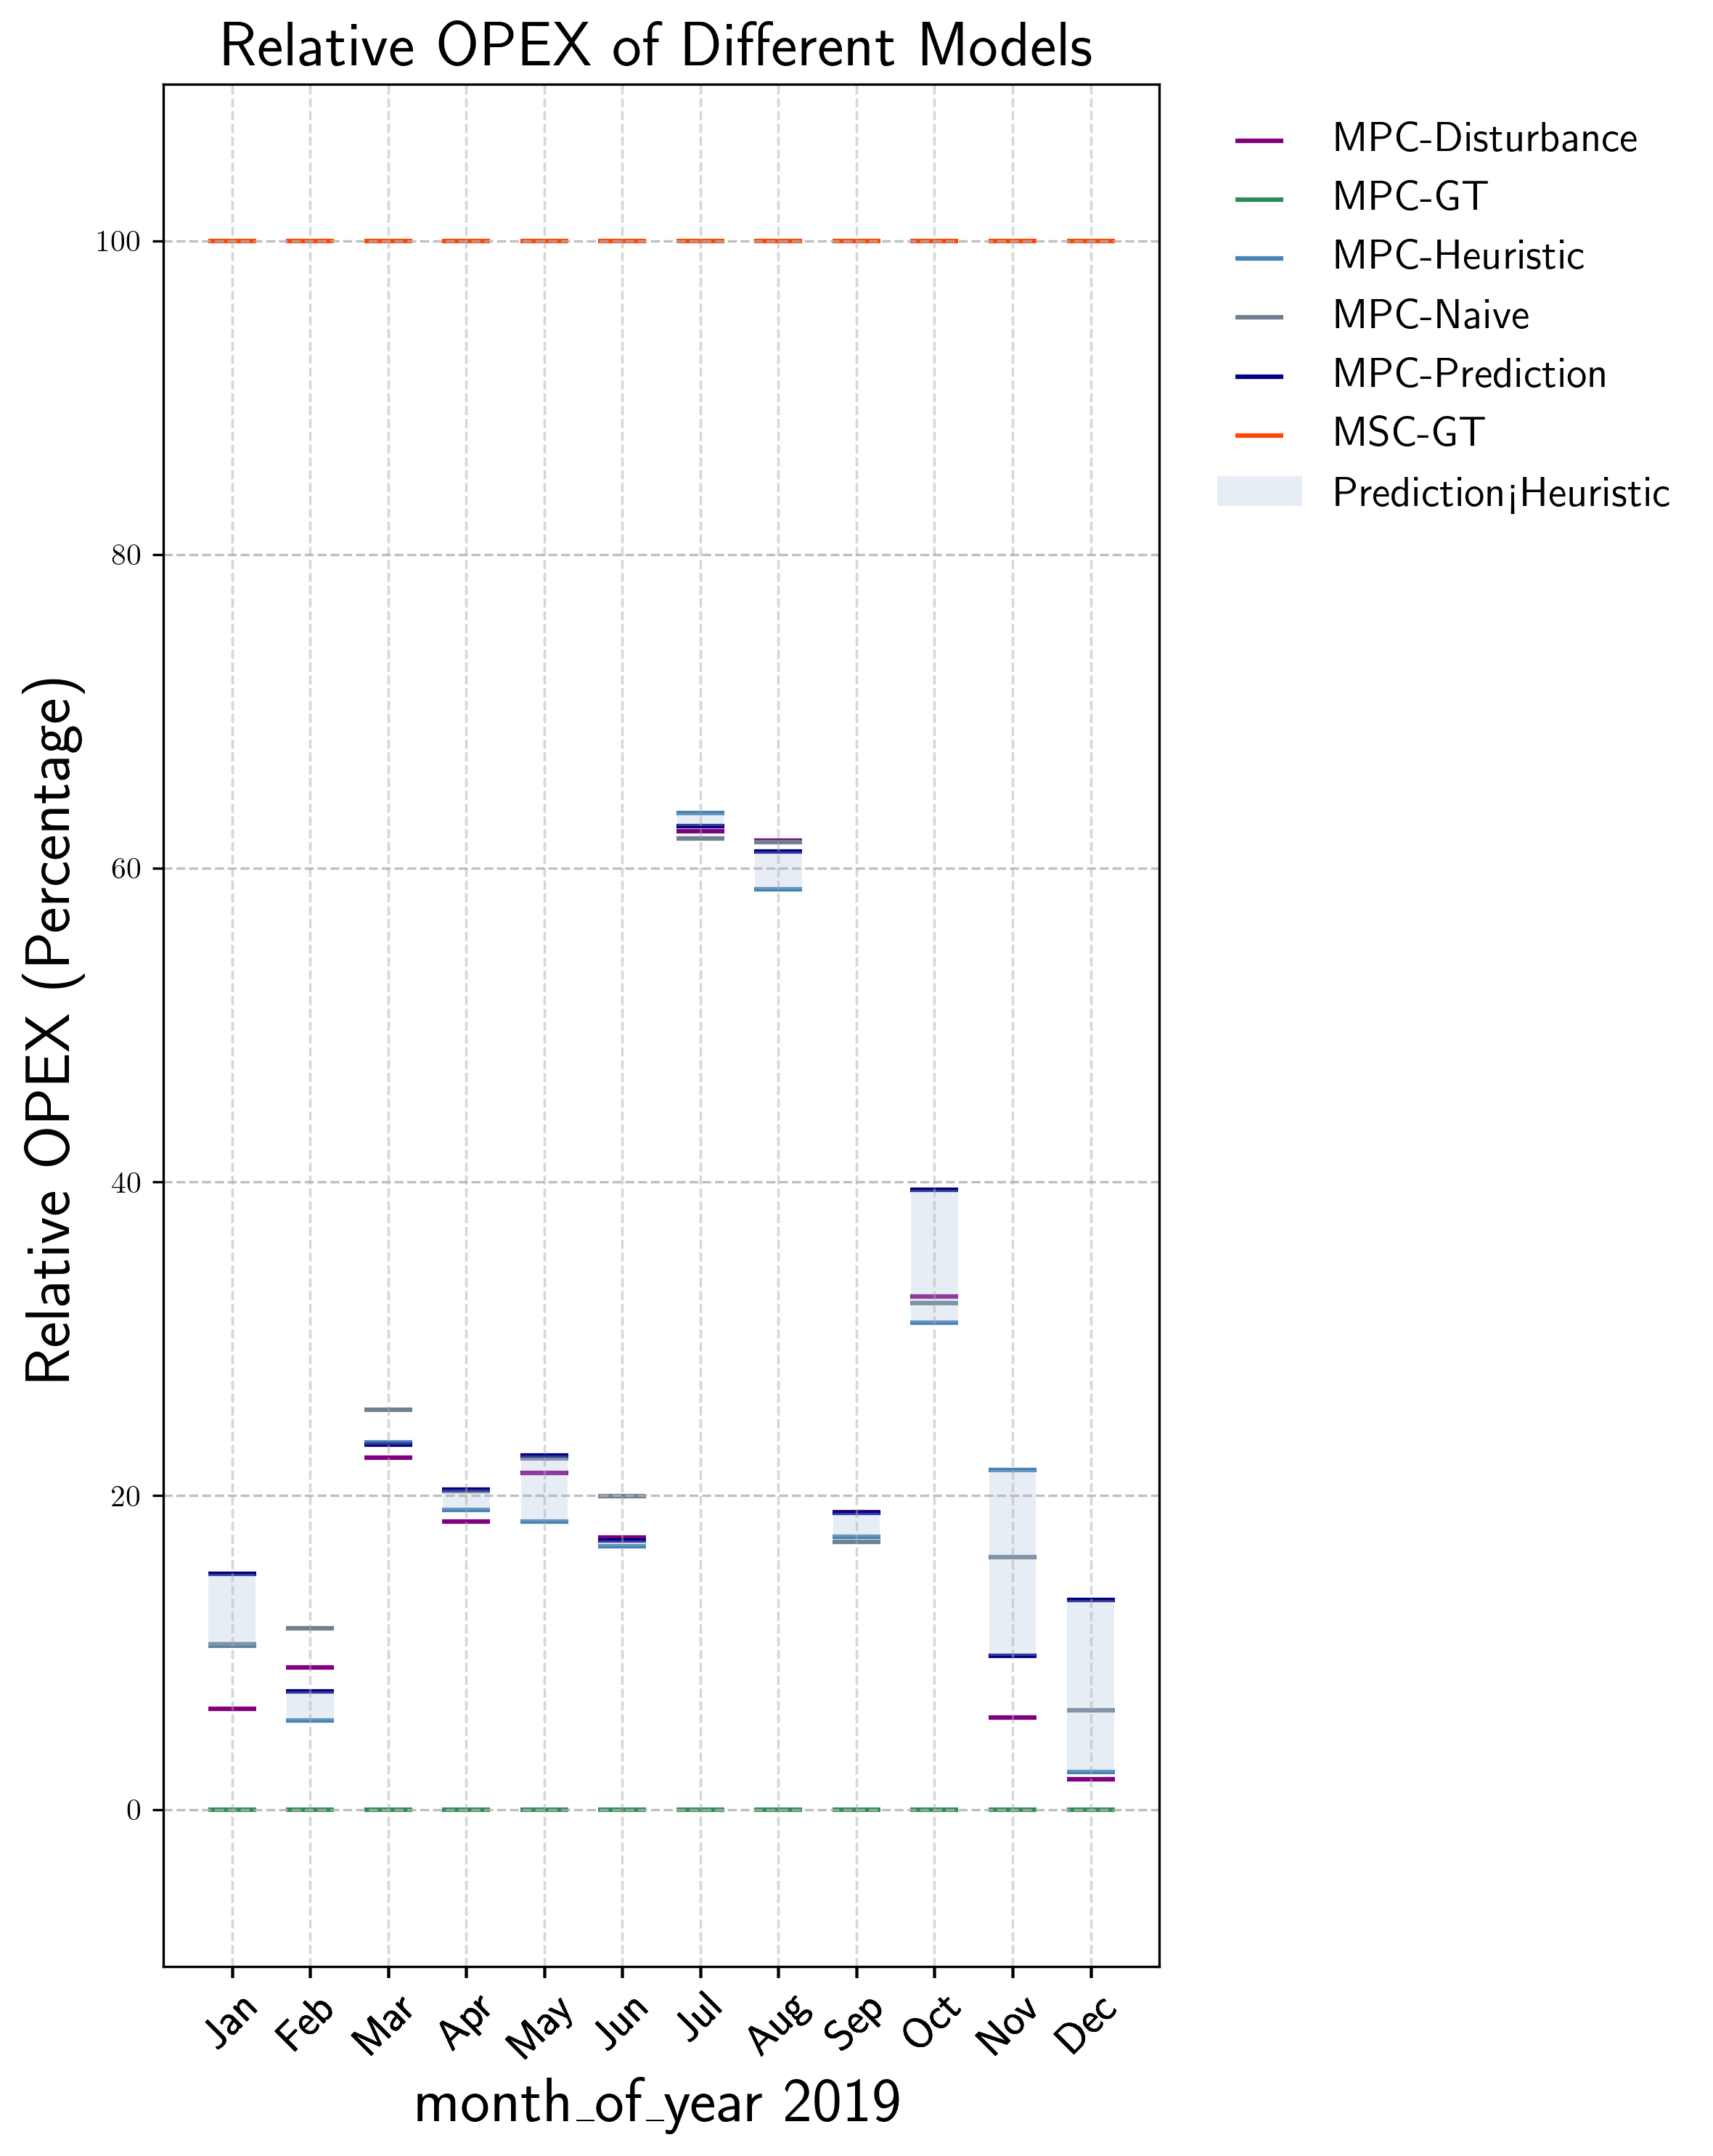

In [12]:
limit=[-10,110]
figsize=(8,10)
r_opex_month_6dc=plot_origin_valid_bar(df=df_opex_6dc,relative=True,limit=limit,figsize=figsize,
                      key='OPEX',save_fn='thesis-topic1-6h-bat-12months-0.6dc-relative-opex.png',
                      fontsize=14,duration_key='month_of_year',
                      show_notes=False)

plot_params={
    "subplot1":{
        "df":df_opex_6dc,
        "relative":True,
        "limit":[-10,110],
        "key":"OPEX",
        "fontsize":14,
        "duration_key":"month_of_year",
        "subtitle":""
    },
    "figsize":(8,10),
    "show_notes":False,
    "save_fn":'thesis-topic1-6h-bat-12months-0.6dc-relative-opex.png',
}

# plot for thesis topic 2

In [ ]:
# disturbance methods:
#   uniform (error distributed evenly of negative and positive)
#   uniform_neg (all pred-ground_truth<0)
#   uniform_pos (all pred-ground_truth>0)
#   normal, normal_neg, normal_pos follow similar rules

In [4]:
# load_data
path=path_prefix+r"\output\experiments\thesis_topic2\6h-bat-6months-disturbance-type.xlsx"
df_dist_type=pd.read_excel(path)

valid_df=df_dist_type[df_dist_type["status"]=='D']
valid_df.reset_index(inplace=True)

# filter data
start, end="03-01", "04-01"
df_march=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

start, end="06-01", "07-01"
df_june=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

In [66]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import pandas as pd
import sys
import calendar
from matplotlib.lines import Line2D

# set default params of plot
rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
}


def mplot_disturbance_type(params):
    fig, axs = plt.subplots(nrows=1, ncols=params["n_subplots"],
        figsize=params["figsize"],
        sharey=params["sharey"])
    fontsize=params["fontsize"]
    relative=params["relative"]
    compare_key=params["compare_key"]
    df=params["df"]
    for i in range(params["n_subplots"]):
        i=str(i)
        key=params["subplots"][i]["key"]
        
        limit=params["subplots"][i]["limit"]  
        method_key=params["subplots"][i]["method"]
        x_key=params["subplots"][i]["x_key"]
        subtitle=params["subplots"][i]["subtitle"]
        i=int(i)
        
        x_labels=np.array(df[df[compare_key]==method_key][x_key])
        x_coor=np.linspace(0, len(df[df[compare_key]==method_key][x_key])-1, len(df[df[compare_key]==method_key][x_key]))
        y_coor_tou=np.array(df[df[compare_key]==method_key]["tou_cost"])
        y_coor_dc=np.array(df[df[compare_key]==method_key]["demand_charge"])

        axs[i].bar(x=x_coor,height=y_coor_tou,
                bottom=[0]*len(x_coor),
                color='lightblue',width=0.5,
                alpha=0.5,label="tou_cost")
        axs[i].bar(x=x_coor,height=y_coor_dc,
                bottom=y_coor_tou,
                color='cadetblue',width=0.5,
                alpha=0.5,label="demand_charge")
    
        axs[i].set_xticks(ticks=x_coor)
        axs[i].set_xticklabels(labels=x_labels,fontsize=fontsize,rotation=45)

        for label, color in zip(axs[i].get_xticklabels(), ["darkred"]*3+["black"]*13+["darkred"]*5):
            label.set_color(color)

        axs[i].set_ylim(limit)
        axs[i].set_title(subtitle,fontsize=fontsize*1.2)
        axs[i].axhline(y=df.loc[(df.pred_model=='GT')&(df.method=='MPC')]["OPEX"].values[0],
                       color='seagreen', linestyle='-', linewidth=1, label="MPC-GT-OPEX")
        axs[i].axhline(y=df.loc[(df.pred_model=='GT')&(df.method=='MPC')]["tou_cost"].values[0],
                       color='seagreen', linestyle='--', linewidth=1, label="MPC-GT-tou")
        axs[i].axhline(y=df.loc[(df.pred_model=='GT')&(df.method=='RBC')]["OPEX"].values[0],
                       color='orangered', linestyle='-', linewidth=1, label="MSC-GT-OPEX")
        axs[i].axhline(y=df.loc[(df.pred_model=='GT')&(df.method=='RBC')]["tou_cost"].values[0],
                       color='orangered', linestyle='--', linewidth=1, label="MSC-GT-tou")
        
        if i==0:
            
            axs[i].set_xlabel("MAPE(\%)",fontsize=fontsize*1.5,loc="left")
            axs[i].set_ylabel("Relative "*relative+key+" (Percentage)"*relative+"(US dollar/day)"*(not relative),fontsize=fontsize*1.5)    
    
    leg = plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), fontsize=fontsize)
    plt.suptitle(params["suptitle"],fontsize=fontsize*1.5)
    plt.tight_layout()
    
    if params["save_fn"] is not None:
        plt.savefig(params["save_fn"])
    plt.show()
    
    return
            
        

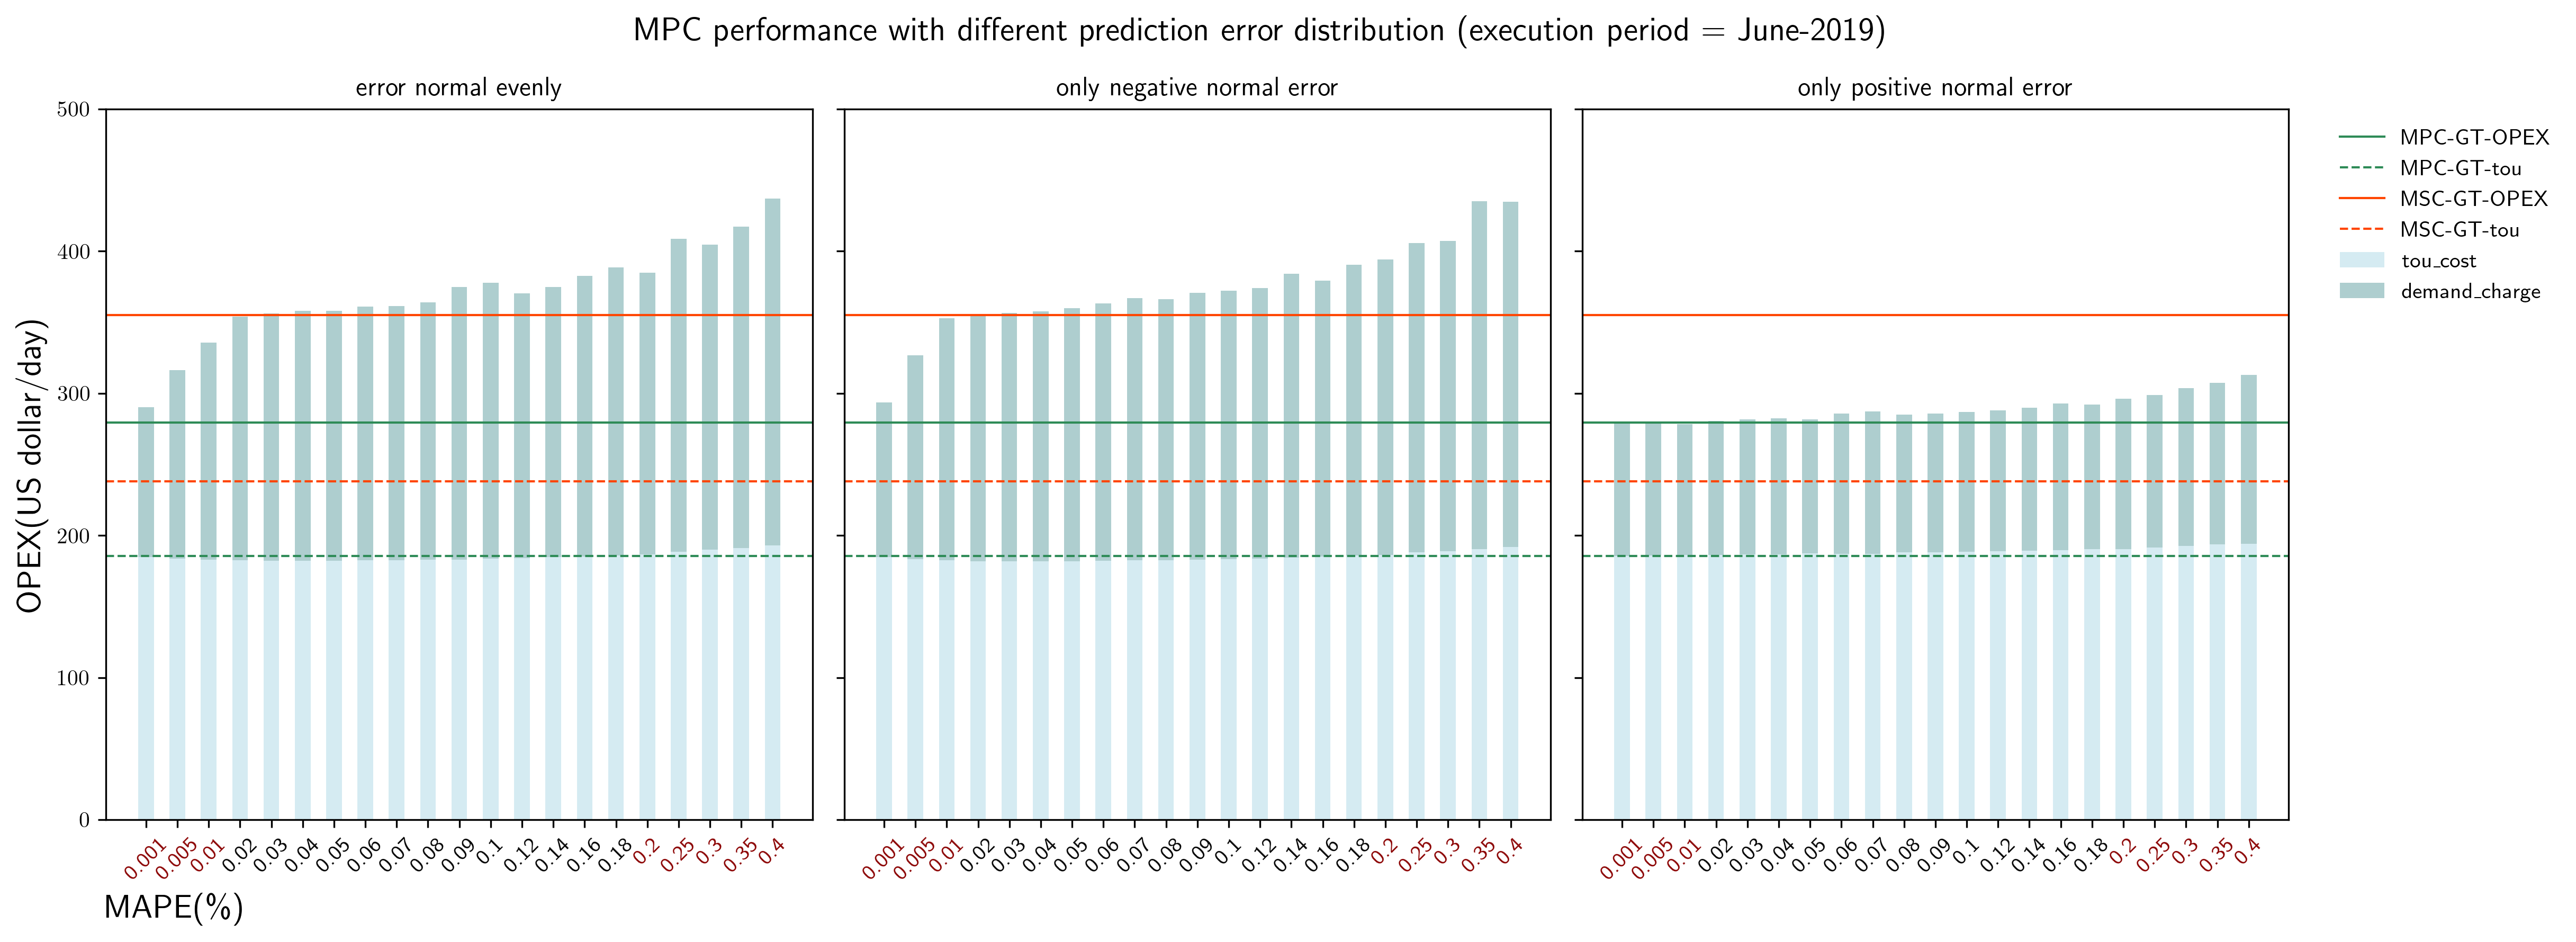

In [67]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"normal",
            "subtitle":"error normal evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"normal_neg",
            "subtitle":"only negative normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"normal_pos",
            "subtitle":"only positive normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_june,   
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-june-normal.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = June-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

In [ ]:
df_march_shrink=df_march.loc[df_march["disturbance_scale"].isin[] ]

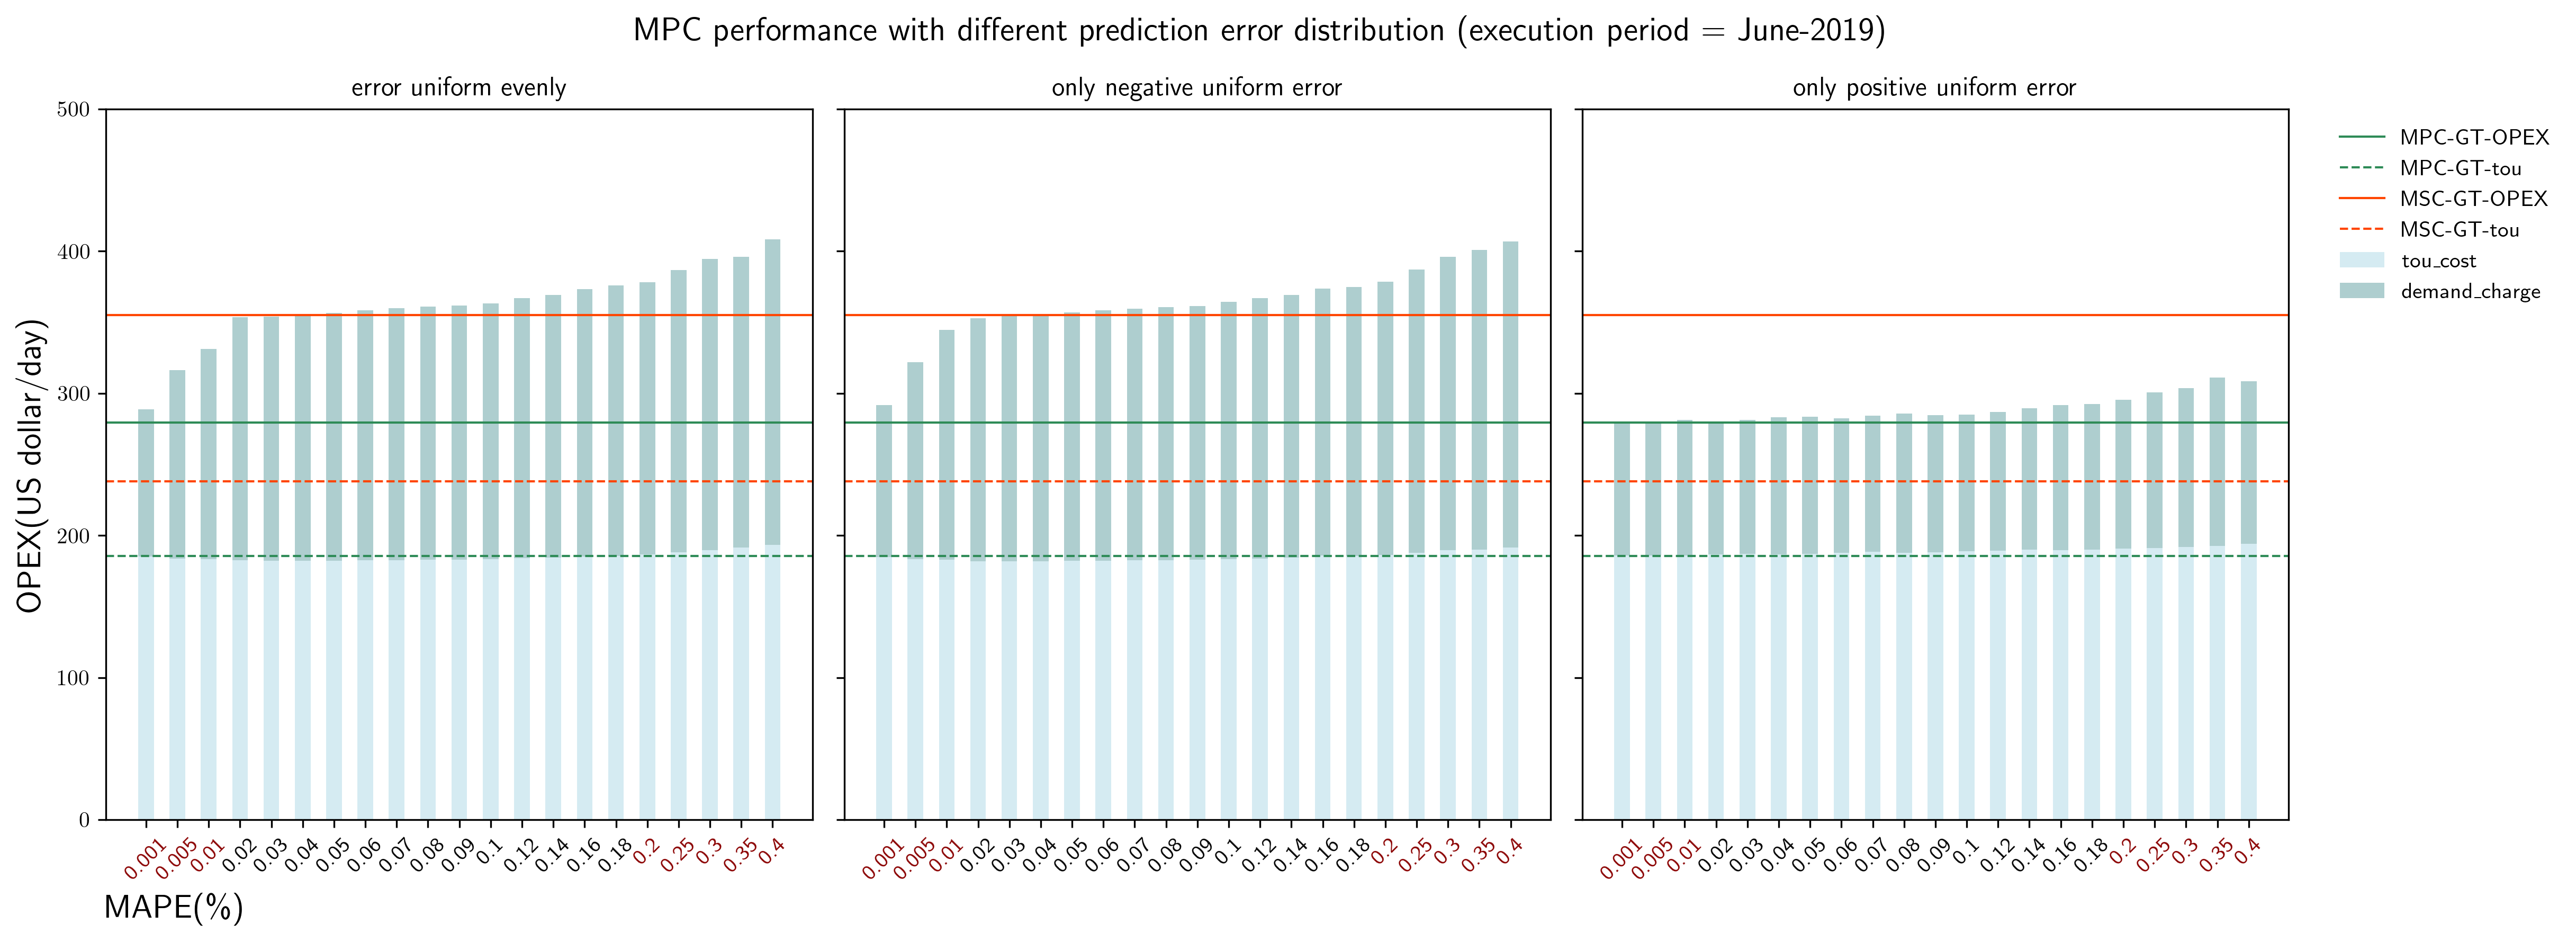

In [84]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"uniform",
            "subtitle":"error uniform evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"uniform_neg",
            "subtitle":"only negative uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"uniform_pos",
            "subtitle":"only positive uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_june,   
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-june-uniform.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = June-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

# plot for thesis topic 3

In [ ]:
# redefine optimization process methods:
#   minimize
#   minimize_cap
#   zero

In [81]:
# load_data
path=path_prefix+r"\output\experiments\thesis_topic3\6h-bat-6weeks-disturbance-type.xlsx"
df_method=pd.read_excel(path)

valid_df=df_method[df_method["status"]=='D']
valid_df.reset_index(inplace=True)

# filter data
start, end="03-04", "03-11"
df_march_week1=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

start, end="06-03", "06-10"
df_june_week1=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

In [82]:
df_june_week1_normal=df_june_week1.drop(df_june_week1.loc\
    [df_june_week1["disturbance_rule"].isin(\
        ["normal_pos","normal_neg","uniform","uniform_neg","uniform_pos"])].index)

In [79]:
df_june_week1_normal

,index,id,status,bld,pv,ev,method,strategy,B_kWh,pred_model,...,grid_export,import_cost,export_revenue,grid_max,bat_e_terminal,bat_e_terminal_revenue,load_bld_error_max_neg,load_bld_error_max_pos,load_pv_error_max_neg,load_pv_error_max_pos
162,425,426,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,5.887170,266.277682,0.825119,162.890864,158.451282,26.868237,-5.639153,7.300454,0.0,0.0
163,427,428,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,12.046791,267.295877,1.588729,169.827639,154.068208,26.125008,-15.505247,13.237176,0.0,0.0
164,429,430,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,17.198182,267.998748,2.225697,172.735768,140.132053,23.761885,-16.667259,21.599931,0.0,0.0
165,431,432,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,23.677865,269.707918,3.269482,181.232305,163.086739,27.654261,-27.221988,35.373951,0.0,0.0
166,433,434,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,30.867679,270.468536,4.285572,198.574156,129.618197,21.979074,-35.027864,40.579248,0.0,0.0
167,438,439,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,54.988374,276.148175,7.408598,219.695036,82.427834,13.977107,-73.065083,90.979991,0.0,0.0
168,440,441,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,89.938187,283.344985,12.233266,229.297664,94.010553,15.941164,-104.642828,120.371740,0.0,0.0
169,442,443,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,130.881940,290.441200,17.727869,259.975601,82.098549,13.921271,-142.289872,148.641838,0.0,0.0
210,551,552,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,6.273296,266.392386,0.861271,159.346760,151.732393,25.728929,-6.332633,7.599617,0.0,0.0
211,553,554,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,14.141984,267.920392,1.978175,160.945199,144.963726,24.581182,-13.440982,18.511431,0.0,0.0


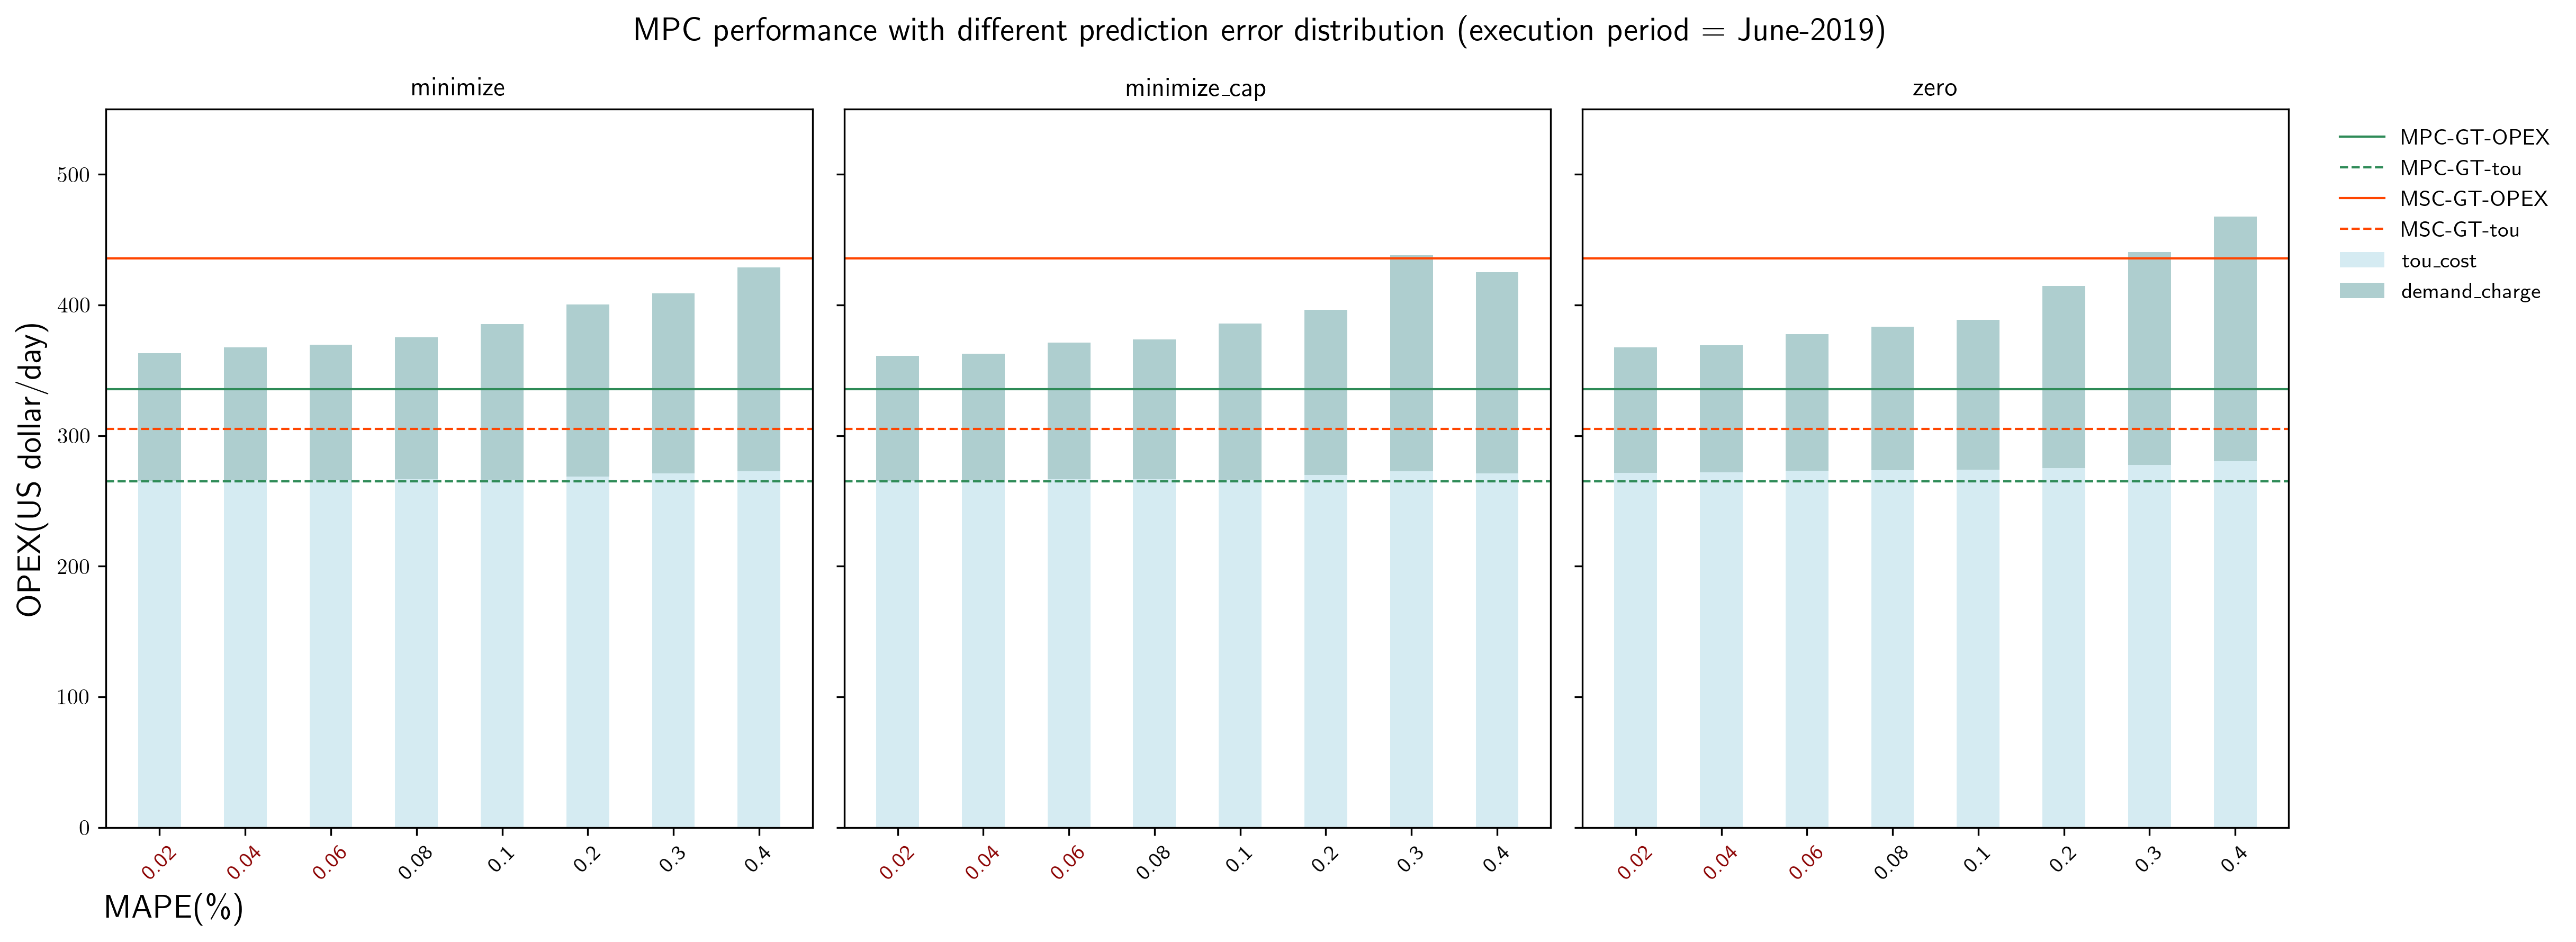

In [86]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"by_solution",
            "subtitle":"by_solution",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "1":{       
            "key":"OPEX",
            "method":"minimize",
            "subtitle":"minimize",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            
            "method":"minimize_cap",
            "subtitle":"minimize_cap",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "3":{
            "key":"OPEX",
            "method":"zero",
            "subtitle":"zero",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"p_grid_max_method",
    "df":df_june_week1_normal,   
    "relative":False,
    "fontsize":10,
    "n_subplots":4,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic3-6h-bat-week-normal.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = June-2019)"
}
r_opex_month_6dc=mplot_disturbance_type(plot_params)